In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape(((72*3+1)*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape(((72*3+1)*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(1171, 100, 100)


In [17]:
print(y_test.shape)

(131, 100, 100)


In [18]:
print(x_train.shape)

(1171, 15, 1)


In [19]:
print(x_test.shape)

(131, 15, 1)


In [20]:
theta_train.shape

(1171,)

In [21]:
tsr_train.shape

(1171,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((1171, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((131, 2, 1))

In [28]:
tsr_theta_train.shape

(1171, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
30/30 [==============================] - 1s 3ms/step - loss: 0.0200 - rmse: 0.1413
Epoch 2/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 3/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 4/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 5/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 7/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 8/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0186 - rmse: 0.1366
Epoch 9/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 10/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 11/10000
30/30 [=======

30/30 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1259
Epoch 85/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 86/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1255
Epoch 87/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 88/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 89/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 90/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 91/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0156 - rmse: 0.1251
Epoch 92/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0155 - rmse: 0.1246
Epoch 93/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0154 - rmse: 0.1242
Epoch 94/10000
30/30 [=============

30/30 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.1028
Epoch 168/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1024
Epoch 169/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0107 - rmse: 0.1033
Epoch 170/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0106 - rmse: 0.1029
Epoch 171/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.1015
Epoch 172/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 173/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0102 - rmse: 0.1011
Epoch 174/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0102 - rmse: 0.1008
Epoch 175/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.1002
Epoch 176/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0101 - rmse: 0.1004
Epoch 177/10000
30/30 [===

30/30 [==============================] - 0s 3ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 250/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0073 - rmse: 0.0857
Epoch 251/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0071 - rmse: 0.0843
Epoch 252/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 253/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 254/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0838
Epoch 255/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0843
Epoch 256/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 257/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 258/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 259/10000
30/30 [===

30/30 [==============================] - 0s 3ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 332/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0713
Epoch 333/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0702
Epoch 334/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 335/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 336/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0701
Epoch 337/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 338/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 339/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0047 - rmse: 0.0689
Epoch 340/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 341/10000
30/30 [===

30/30 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0588
Epoch 414/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 415/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 416/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 417/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 418/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 419/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 420/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 421/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 422/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 423/10000
30/30 [===

30/30 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 496/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 497/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 498/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 499/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 500/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 501/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 502/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 503/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 504/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 505/10000
30/30 [===

30/30 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 578/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 579/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 580/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 581/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 582/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 583/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 584/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0394
Epoch 585/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 586/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 587/10000
30/30 [===

30/30 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 660/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 661/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 662/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 663/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 664/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 665/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 666/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 667/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 668/10000
30/30 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 669/10000
30/30 [===

30/30 [==============================] - 0s 3ms/step - loss: 8.4488e-04 - rmse: 0.0291
Epoch 741/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.6261e-04 - rmse: 0.0294
Epoch 742/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.4810e-04 - rmse: 0.0291
Epoch 743/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.3229e-04 - rmse: 0.0288
Epoch 744/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.3599e-04 - rmse: 0.0289
Epoch 745/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.4424e-04 - rmse: 0.0307
Epoch 746/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.2691e-04 - rmse: 0.0288
Epoch 747/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.4969e-04 - rmse: 0.0291
Epoch 748/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.7653e-04 - rmse: 0.0296
Epoch 749/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.1660e-04 -

30/30 [==============================] - 0s 3ms/step - loss: 6.4317e-04 - rmse: 0.0254
Epoch 820/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.2422e-04 - rmse: 0.0250
Epoch 821/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.3643e-04 - rmse: 0.0252
Epoch 822/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.4250e-04 - rmse: 0.0253
Epoch 823/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.7392e-04 - rmse: 0.0260
Epoch 824/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.2946e-04 - rmse: 0.0251
Epoch 825/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.9966e-04 - rmse: 0.0265
Epoch 826/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.1295e-04 - rmse: 0.0267
Epoch 827/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.1114e-04 - rmse: 0.0247
Epoch 828/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.3361e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 4.5895e-04 - rmse: 0.0214
Epoch 899/10000
30/30 [==============================] - 0s 4ms/step - loss: 5.0479e-04 - rmse: 0.0225
Epoch 900/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.0305e-04 - rmse: 0.0224
Epoch 901/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.0111e-04 - rmse: 0.0224
Epoch 902/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.6231e-04 - rmse: 0.0237
Epoch 903/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.0291e-04 - rmse: 0.0265
Epoch 904/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.0198e-04 - rmse: 0.0265
Epoch 905/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.6819e-04 - rmse: 0.0258
Epoch 906/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.9107e-04 - rmse: 0.0243
Epoch 907/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.0930e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 4.2483e-04 - rmse: 0.0206
Epoch 978/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7322e-04 - rmse: 0.0218
Epoch 979/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4738e-04 - rmse: 0.0212
Epoch 980/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.3788e-04 - rmse: 0.0209
Epoch 981/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.0073e-04 - rmse: 0.0200
Epoch 982/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.0522e-04 - rmse: 0.0201
Epoch 983/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.0540e-04 - rmse: 0.0201
Epoch 984/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.4048e-04 - rmse: 0.0210
Epoch 985/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.2328e-04 - rmse: 0.0206
Epoch 986/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.0292e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 3.2888e-04 - rmse: 0.0181
Epoch 1057/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9930e-04 - rmse: 0.0200
Epoch 1058/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3179e-04 - rmse: 0.0208
Epoch 1059/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7946e-04 - rmse: 0.0195
Epoch 1060/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6377e-04 - rmse: 0.0191
Epoch 1061/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.7542e-04 - rmse: 0.0194
Epoch 1062/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.1582e-04 - rmse: 0.0204
Epoch 1063/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.6474e-04 - rmse: 0.0191
Epoch 1064/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.7146e-04 - rmse: 0.0193
Epoch 1065/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.7

30/30 [==============================] - 0s 5ms/step - loss: 3.0759e-04 - rmse: 0.0175
Epoch 1135/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.9833e-04 - rmse: 0.0173
Epoch 1136/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8427e-04 - rmse: 0.0169
Epoch 1137/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8670e-04 - rmse: 0.0169
Epoch 1138/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2122e-04 - rmse: 0.0179
Epoch 1139/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1791e-04 - rmse: 0.0178
Epoch 1140/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4221e-04 - rmse: 0.0185
Epoch 1141/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2632e-04 - rmse: 0.0181
Epoch 1142/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.7101e-04 - rmse: 0.0193
Epoch 1143/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.2

30/30 [==============================] - 0s 3ms/step - loss: 2.5172e-04 - rmse: 0.0159
Epoch 1213/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.3587e-04 - rmse: 0.0154
Epoch 1214/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4414e-04 - rmse: 0.0156
Epoch 1215/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4412e-04 - rmse: 0.0156
Epoch 1216/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3322e-04 - rmse: 0.0153
Epoch 1217/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5568e-04 - rmse: 0.0160
Epoch 1218/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4725e-04 - rmse: 0.0157
Epoch 1219/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4873e-04 - rmse: 0.0158
Epoch 1220/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.5012e-04 - rmse: 0.0158
Epoch 1221/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6

30/30 [==============================] - 0s 3ms/step - loss: 2.7081e-04 - rmse: 0.0165
Epoch 1291/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3957e-04 - rmse: 0.0155
Epoch 1292/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.4037e-04 - rmse: 0.0155
Epoch 1293/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.4892e-04 - rmse: 0.0187
Epoch 1294/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1925e-04 - rmse: 0.0179
Epoch 1295/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.0918e-04 - rmse: 0.0176
Epoch 1296/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3906e-04 - rmse: 0.0155
Epoch 1297/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4423e-04 - rmse: 0.0156
Epoch 1298/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1153e-04 - rmse: 0.0145
Epoch 1299/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2

30/30 [==============================] - 0s 3ms/step - loss: 3.0302e-04 - rmse: 0.0174
Epoch 1369/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0486e-04 - rmse: 0.0143
Epoch 1370/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3761e-04 - rmse: 0.0154
Epoch 1371/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5501e-04 - rmse: 0.0160
Epoch 1372/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0952e-04 - rmse: 0.0145
Epoch 1373/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0025e-04 - rmse: 0.0142
Epoch 1374/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9283e-04 - rmse: 0.0139
Epoch 1375/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0616e-04 - rmse: 0.0144
Epoch 1376/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2097e-04 - rmse: 0.0149
Epoch 1377/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3

30/30 [==============================] - 0s 3ms/step - loss: 2.0054e-04 - rmse: 0.0142
Epoch 1447/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9860e-04 - rmse: 0.0141
Epoch 1448/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.6866e-04 - rmse: 0.0130
Epoch 1449/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9232e-04 - rmse: 0.0139
Epoch 1450/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.6746e-04 - rmse: 0.0164
Epoch 1451/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.1534e-04 - rmse: 0.0147
Epoch 1452/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0133e-04 - rmse: 0.0142
Epoch 1453/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5735e-04 - rmse: 0.0160
Epoch 1454/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3881e-04 - rmse: 0.0155
Epoch 1455/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.5

30/30 [==============================] - 0s 3ms/step - loss: 3.0282e-04 - rmse: 0.0174
Epoch 1525/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.8695e-04 - rmse: 0.0197
Epoch 1526/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5134e-04 - rmse: 0.0159
Epoch 1527/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.7619e-04 - rmse: 0.0133
Epoch 1528/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.7325e-04 - rmse: 0.0132
Epoch 1529/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.5540e-04 - rmse: 0.0125
Epoch 1530/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8879e-04 - rmse: 0.0137
Epoch 1531/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2267e-04 - rmse: 0.0149
Epoch 1532/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9643e-04 - rmse: 0.0140
Epoch 1533/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9

30/30 [==============================] - 0s 3ms/step - loss: 2.0796e-04 - rmse: 0.0144
Epoch 1603/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.1167e-04 - rmse: 0.0145
Epoch 1604/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8494e-04 - rmse: 0.0136
Epoch 1605/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8620e-04 - rmse: 0.0136
Epoch 1606/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2455e-04 - rmse: 0.0150
Epoch 1607/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2746e-04 - rmse: 0.0151
Epoch 1608/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8766e-04 - rmse: 0.0137
Epoch 1609/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.7012e-04 - rmse: 0.0130
Epoch 1610/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0113e-04 - rmse: 0.0142
Epoch 1611/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3

30/30 [==============================] - 0s 4ms/step - loss: 1.5118e-04 - rmse: 0.0123
Epoch 1681/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6062e-04 - rmse: 0.0127
Epoch 1682/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.8319e-04 - rmse: 0.0135
Epoch 1683/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.0296e-04 - rmse: 0.0201
Epoch 1684/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.8763e-04 - rmse: 0.0170
Epoch 1685/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.1570e-04 - rmse: 0.0204
Epoch 1686/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.6313e-04 - rmse: 0.0162
Epoch 1687/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8856e-04 - rmse: 0.0137
Epoch 1688/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.6933e-04 - rmse: 0.0130
Epoch 1689/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.7

30/30 [==============================] - 0s 5ms/step - loss: 1.8418e-04 - rmse: 0.0136
Epoch 1759/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6443e-04 - rmse: 0.0128
Epoch 1760/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1018e-04 - rmse: 0.0145
Epoch 1761/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.6879e-04 - rmse: 0.0130
Epoch 1762/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.4217e-04 - rmse: 0.0119
Epoch 1763/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4366e-04 - rmse: 0.0120
Epoch 1764/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4756e-04 - rmse: 0.0121
Epoch 1765/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3450e-04 - rmse: 0.0116
Epoch 1766/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3244e-04 - rmse: 0.0115
Epoch 1767/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.6

30/30 [==============================] - 0s 5ms/step - loss: 1.6482e-04 - rmse: 0.0128
Epoch 1837/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7914e-04 - rmse: 0.0134
Epoch 1838/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4439e-04 - rmse: 0.0120
Epoch 1839/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4150e-04 - rmse: 0.0119
Epoch 1840/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.2739e-04 - rmse: 0.0113
Epoch 1841/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1493e-04 - rmse: 0.0107
Epoch 1842/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.1849e-04 - rmse: 0.0109
Epoch 1843/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4572e-04 - rmse: 0.0121
Epoch 1844/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0993e-04 - rmse: 0.0145
Epoch 1845/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.7

30/30 [==============================] - 0s 5ms/step - loss: 1.6800e-04 - rmse: 0.0130
Epoch 1915/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7158e-04 - rmse: 0.0131
Epoch 1916/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8539e-04 - rmse: 0.0136
Epoch 1917/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3887e-04 - rmse: 0.0155
Epoch 1918/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7666e-04 - rmse: 0.0133
Epoch 1919/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4371e-04 - rmse: 0.0120
Epoch 1920/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2310e-04 - rmse: 0.0111
Epoch 1921/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.7191e-04 - rmse: 0.0131
Epoch 1922/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.7820e-04 - rmse: 0.0133
Epoch 1923/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3

30/30 [==============================] - 0s 5ms/step - loss: 1.1728e-04 - rmse: 0.0108
Epoch 1993/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2162e-04 - rmse: 0.0110
Epoch 1994/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6783e-04 - rmse: 0.0130
Epoch 1995/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8397e-04 - rmse: 0.0136
Epoch 1996/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6311e-04 - rmse: 0.0128
Epoch 1997/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9170e-04 - rmse: 0.0138
Epoch 1998/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2416e-04 - rmse: 0.0150
Epoch 1999/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5717e-04 - rmse: 0.0160
Epoch 2000/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.8606e-04 - rmse: 0.0136
Epoch 2001/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.4

30/30 [==============================] - 0s 4ms/step - loss: 1.4784e-04 - rmse: 0.0122
Epoch 2071/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5598e-04 - rmse: 0.0125
Epoch 2072/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0389e-04 - rmse: 0.0143
Epoch 2073/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5034e-04 - rmse: 0.0123
Epoch 2074/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2376e-04 - rmse: 0.0111
Epoch 2075/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5274e-04 - rmse: 0.0124
Epoch 2076/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1104e-04 - rmse: 0.0145
Epoch 2077/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2891e-04 - rmse: 0.0151
Epoch 2078/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9477e-04 - rmse: 0.0140
Epoch 2079/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6

30/30 [==============================] - 0s 5ms/step - loss: 1.2017e-04 - rmse: 0.0110
Epoch 2149/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1512e-04 - rmse: 0.0107
Epoch 2150/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0260e-04 - rmse: 0.0101
Epoch 2151/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3751e-04 - rmse: 0.0117
Epoch 2152/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8074e-04 - rmse: 0.0168
Epoch 2153/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8770e-04 - rmse: 0.0137
Epoch 2154/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5617e-04 - rmse: 0.0160
Epoch 2155/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.7022e-04 - rmse: 0.0164
Epoch 2156/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3761e-04 - rmse: 0.0154
Epoch 2157/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0

30/30 [==============================] - 0s 5ms/step - loss: 1.0498e-04 - rmse: 0.0102
Epoch 2227/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2837e-04 - rmse: 0.0113
Epoch 2228/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5150e-04 - rmse: 0.0123
Epoch 2229/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6013e-04 - rmse: 0.0127
Epoch 2230/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9825e-04 - rmse: 0.0141
Epoch 2231/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4898e-04 - rmse: 0.0158
Epoch 2232/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4489e-04 - rmse: 0.0120
Epoch 2233/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.3419e-04 - rmse: 0.0116
Epoch 2234/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.3406e-05 - rmse: 0.0097
Epoch 2235/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.2

30/30 [==============================] - 0s 3ms/step - loss: 3.3846e-04 - rmse: 0.0184
Epoch 2305/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.0934e-04 - rmse: 0.0145
Epoch 2306/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5956e-04 - rmse: 0.0126
Epoch 2307/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5061e-04 - rmse: 0.0123
Epoch 2308/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2953e-04 - rmse: 0.0114
Epoch 2309/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0352e-04 - rmse: 0.0102
Epoch 2310/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.8185e-05 - rmse: 0.0099
Epoch 2311/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0180e-04 - rmse: 0.0101
Epoch 2312/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1802e-04 - rmse: 0.0109
Epoch 2313/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0

30/30 [==============================] - 0s 3ms/step - loss: 9.3861e-05 - rmse: 0.0097
Epoch 2383/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.3638e-05 - rmse: 0.0091
Epoch 2384/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.0887e-04 - rmse: 0.0104
Epoch 2385/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3434e-04 - rmse: 0.0116
Epoch 2386/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3706e-04 - rmse: 0.0117
Epoch 2387/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3485e-04 - rmse: 0.0116
Epoch 2388/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.4130e-04 - rmse: 0.0119
Epoch 2389/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6616e-04 - rmse: 0.0129
Epoch 2390/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0189e-04 - rmse: 0.0142
Epoch 2391/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9

30/30 [==============================] - 0s 5ms/step - loss: 1.5521e-04 - rmse: 0.0125
Epoch 2461/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2936e-04 - rmse: 0.0114
Epoch 2462/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2789e-04 - rmse: 0.0113
Epoch 2463/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7081e-04 - rmse: 0.0131
Epoch 2464/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9972e-04 - rmse: 0.0141
Epoch 2465/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6297e-04 - rmse: 0.0128
Epoch 2466/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5008e-04 - rmse: 0.0123
Epoch 2467/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4499e-04 - rmse: 0.0120
Epoch 2468/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1569e-04 - rmse: 0.0108
Epoch 2469/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4

30/30 [==============================] - 0s 3ms/step - loss: 9.1049e-05 - rmse: 0.0095
Epoch 2539/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.0163e-05 - rmse: 0.0095
Epoch 2540/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.4155e-05 - rmse: 0.0092
Epoch 2541/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.5668e-05 - rmse: 0.0093
Epoch 2542/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.3856e-05 - rmse: 0.0086
Epoch 2543/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.1515e-05 - rmse: 0.0085
Epoch 2544/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.0397e-05 - rmse: 0.0084
Epoch 2545/10000
30/30 [==============================] - 0s 4ms/step - loss: 7.8161e-05 - rmse: 0.0088
Epoch 2546/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.4403e-05 - rmse: 0.0092
Epoch 2547/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.7

30/30 [==============================] - 0s 3ms/step - loss: 8.4398e-05 - rmse: 0.0092
Epoch 2617/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.9993e-05 - rmse: 0.0084
Epoch 2618/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.0142e-05 - rmse: 0.0084
Epoch 2619/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.8304e-05 - rmse: 0.0088
Epoch 2620/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.9956e-05 - rmse: 0.0089
Epoch 2621/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.8340e-05 - rmse: 0.0094
Epoch 2622/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.1754e-04 - rmse: 0.0108
Epoch 2623/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.2577e-04 - rmse: 0.0112
Epoch 2624/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.1232e-04 - rmse: 0.0106
Epoch 2625/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.4

30/30 [==============================] - 0s 3ms/step - loss: 2.0615e-04 - rmse: 0.0144
Epoch 2695/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.6732e-04 - rmse: 0.0129
Epoch 2696/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.1397e-04 - rmse: 0.0107
Epoch 2697/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.0616e-04 - rmse: 0.0103
Epoch 2698/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.5272e-04 - rmse: 0.0124
Epoch 2699/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8341e-04 - rmse: 0.0135
Epoch 2700/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4176e-04 - rmse: 0.0119
Epoch 2701/10000
30/30 [==============================] - 0s 4ms/step - loss: 9.6737e-05 - rmse: 0.0098
Epoch 2702/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.0508e-04 - rmse: 0.0103
Epoch 2703/10000
30/30 [==============================] - 0s 4ms/step - loss: 9.2

30/30 [==============================] - 0s 3ms/step - loss: 8.8588e-05 - rmse: 0.0094
Epoch 2773/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8089e-04 - rmse: 0.0134
Epoch 2774/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3434e-04 - rmse: 0.0153
Epoch 2775/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3521e-04 - rmse: 0.0153
Epoch 2776/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.6929e-04 - rmse: 0.0130
Epoch 2777/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5423e-04 - rmse: 0.0124
Epoch 2778/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0055e-04 - rmse: 0.0100
Epoch 2779/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.8448e-05 - rmse: 0.0099
Epoch 2780/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.1707e-05 - rmse: 0.0096
Epoch 2781/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1

30/30 [==============================] - 0s 4ms/step - loss: 1.1518e-04 - rmse: 0.0107
Epoch 2851/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5797e-04 - rmse: 0.0161
Epoch 2852/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.1222e-04 - rmse: 0.0146
Epoch 2853/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.8820e-04 - rmse: 0.0170
Epoch 2854/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.6765e-04 - rmse: 0.0164
Epoch 2855/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.1752e-04 - rmse: 0.0147
Epoch 2856/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8183e-04 - rmse: 0.0135
Epoch 2857/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.1803e-04 - rmse: 0.0109
Epoch 2858/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.8325e-05 - rmse: 0.0094
Epoch 2859/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.9

30/30 [==============================] - 0s 5ms/step - loss: 1.2254e-04 - rmse: 0.0111
Epoch 2929/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.9436e-05 - rmse: 0.0089
Epoch 2930/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.5764e-05 - rmse: 0.0098
Epoch 2931/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0284e-04 - rmse: 0.0101
Epoch 2932/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.7332e-05 - rmse: 0.0093
Epoch 2933/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.2744e-05 - rmse: 0.0091
Epoch 2934/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1986e-04 - rmse: 0.0109
Epoch 2935/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2377e-04 - rmse: 0.0111
Epoch 2936/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2168e-04 - rmse: 0.0110
Epoch 2937/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.6

30/30 [==============================] - 0s 5ms/step - loss: 1.0275e-04 - rmse: 0.0101
Epoch 3007/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.0256e-04 - rmse: 0.0101
Epoch 3008/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.9421e-05 - rmse: 0.0095
Epoch 3009/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.8796e-05 - rmse: 0.0089
Epoch 3010/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.0234e-05 - rmse: 0.0084
Epoch 3011/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.1933e-05 - rmse: 0.0091
Epoch 3012/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.5383e-05 - rmse: 0.0092
Epoch 3013/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.0826e-04 - rmse: 0.0104
Epoch 3014/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.9481e-05 - rmse: 0.0095
Epoch 3015/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.7

30/30 [==============================] - 0s 3ms/step - loss: 6.2429e-05 - rmse: 0.0079
Epoch 3085/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3990e-04 - rmse: 0.0118
Epoch 3086/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.4945e-04 - rmse: 0.0158
Epoch 3087/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.5851e-04 - rmse: 0.0126
Epoch 3088/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3871e-04 - rmse: 0.0118
Epoch 3089/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.1862e-04 - rmse: 0.0109
Epoch 3090/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.0773e-04 - rmse: 0.0104
Epoch 3091/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.1657e-04 - rmse: 0.0108
Epoch 3092/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.0194e-04 - rmse: 0.0101
Epoch 3093/10000
30/30 [==============================] - 0s 4ms/step - loss: 8.1

30/30 [==============================] - 0s 3ms/step - loss: 1.2732e-04 - rmse: 0.0113
Epoch 3163/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.8865e-05 - rmse: 0.0099
Epoch 3164/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.9874e-05 - rmse: 0.0084
Epoch 3165/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.2230e-05 - rmse: 0.0085
Epoch 3166/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.1879e-05 - rmse: 0.0079
Epoch 3167/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.9427e-05 - rmse: 0.0083
Epoch 3168/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.1750e-05 - rmse: 0.0079
Epoch 3169/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.7973e-05 - rmse: 0.0082
Epoch 3170/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.6426e-05 - rmse: 0.0082
Epoch 3171/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.1

30/30 [==============================] - 0s 5ms/step - loss: 7.2793e-05 - rmse: 0.0085
Epoch 3241/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5737e-05 - rmse: 0.0081
Epoch 3242/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.1741e-04 - rmse: 0.0108
Epoch 3243/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.8965e-04 - rmse: 0.0138
Epoch 3244/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2991e-04 - rmse: 0.0152
Epoch 3245/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.1232e-04 - rmse: 0.0106
Epoch 3246/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.3705e-05 - rmse: 0.0091
Epoch 3247/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.8131e-05 - rmse: 0.0076
Epoch 3248/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.9738e-05 - rmse: 0.0071
Epoch 3249/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.2

30/30 [==============================] - 0s 5ms/step - loss: 5.5531e-05 - rmse: 0.0075
Epoch 3319/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.3842e-05 - rmse: 0.0086
Epoch 3320/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.6273e-05 - rmse: 0.0087
Epoch 3321/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6636e-04 - rmse: 0.0129
Epoch 3322/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2756e-04 - rmse: 0.0151
Epoch 3323/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.7630e-04 - rmse: 0.0166
Epoch 3324/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0137e-04 - rmse: 0.0142
Epoch 3325/10000
30/30 [==============================] - 0s 4ms/step - loss: 9.1825e-05 - rmse: 0.0096
Epoch 3326/10000
30/30 [==============================] - 0s 4ms/step - loss: 7.1659e-05 - rmse: 0.0085
Epoch 3327/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.1

30/30 [==============================] - 0s 3ms/step - loss: 7.8619e-05 - rmse: 0.0089
Epoch 3397/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.4483e-05 - rmse: 0.0086
Epoch 3398/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.4232e-05 - rmse: 0.0080
Epoch 3399/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.4333e-05 - rmse: 0.0080
Epoch 3400/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.7010e-05 - rmse: 0.0076
Epoch 3401/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.9115e-05 - rmse: 0.0070
Epoch 3402/10000
30/30 [==============================] - 0s 4ms/step - loss: 4.9518e-05 - rmse: 0.0070
Epoch 3403/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.9154e-05 - rmse: 0.0089
Epoch 3404/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.5232e-05 - rmse: 0.0092
Epoch 3405/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0

30/30 [==============================] - 0s 3ms/step - loss: 4.9785e-05 - rmse: 0.0071
Epoch 3475/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.6654e-05 - rmse: 0.0068
Epoch 3476/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.1681e-05 - rmse: 0.0065
Epoch 3477/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.0040e-05 - rmse: 0.0063
Epoch 3478/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2848e-05 - rmse: 0.0065
Epoch 3479/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.8833e-05 - rmse: 0.0083
Epoch 3480/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1643e-05 - rmse: 0.0079
Epoch 3481/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0478e-05 - rmse: 0.0071
Epoch 3482/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6055e-05 - rmse: 0.0068
Epoch 3483/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2

30/30 [==============================] - 0s 3ms/step - loss: 7.1330e-05 - rmse: 0.0084
Epoch 3553/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.1408e-05 - rmse: 0.0078
Epoch 3554/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.1760e-05 - rmse: 0.0085
Epoch 3555/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.2214e-04 - rmse: 0.0111
Epoch 3556/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.5717e-05 - rmse: 0.0093
Epoch 3557/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.6332e-05 - rmse: 0.0081
Epoch 3558/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.2901e-05 - rmse: 0.0085
Epoch 3559/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.0704e-05 - rmse: 0.0071
Epoch 3560/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.8688e-05 - rmse: 0.0070
Epoch 3561/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.4

30/30 [==============================] - 0s 3ms/step - loss: 5.7314e-05 - rmse: 0.0076
Epoch 3631/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.2473e-05 - rmse: 0.0085
Epoch 3632/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.5983e-05 - rmse: 0.0081
Epoch 3633/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.0330e-05 - rmse: 0.0071
Epoch 3634/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.6092e-05 - rmse: 0.0068
Epoch 3635/10000
30/30 [==============================] - 0s 4ms/step - loss: 6.2365e-05 - rmse: 0.0079
Epoch 3636/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2630e-05 - rmse: 0.0073
Epoch 3637/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.3646e-05 - rmse: 0.0080
Epoch 3638/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.9178e-05 - rmse: 0.0083
Epoch 3639/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.7

30/30 [==============================] - 0s 3ms/step - loss: 3.6416e-05 - rmse: 0.0060
Epoch 3709/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.8019e-05 - rmse: 0.0062
Epoch 3710/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.8812e-05 - rmse: 0.0054
Epoch 3711/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.1562e-05 - rmse: 0.0056
Epoch 3712/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.9901e-05 - rmse: 0.0063
Epoch 3713/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.4430e-05 - rmse: 0.0059
Epoch 3714/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.5224e-05 - rmse: 0.0059
Epoch 3715/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.8128e-05 - rmse: 0.0062
Epoch 3716/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.9460e-05 - rmse: 0.0063
Epoch 3717/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.4

30/30 [==============================] - 0s 5ms/step - loss: 5.0151e-05 - rmse: 0.0071
Epoch 3787/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.1291e-05 - rmse: 0.0090
Epoch 3788/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.1148e-05 - rmse: 0.0084
Epoch 3789/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1473e-05 - rmse: 0.0078
Epoch 3790/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.3517e-05 - rmse: 0.0080
Epoch 3791/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.0617e-05 - rmse: 0.0084
Epoch 3792/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.6042e-05 - rmse: 0.0081
Epoch 3793/10000
30/30 [==============================] - 0s 4ms/step - loss: 6.8616e-05 - rmse: 0.0083
Epoch 3794/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.0224e-04 - rmse: 0.0101
Epoch 3795/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.3

30/30 [==============================] - 0s 3ms/step - loss: 5.3509e-05 - rmse: 0.0073
Epoch 3865/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.9446e-05 - rmse: 0.0083
Epoch 3866/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.2988e-05 - rmse: 0.0085
Epoch 3867/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.1373e-05 - rmse: 0.0090
Epoch 3868/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.9266e-05 - rmse: 0.0089
Epoch 3869/10000
30/30 [==============================] - 0s 4ms/step - loss: 6.6371e-05 - rmse: 0.0081
Epoch 3870/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8017e-05 - rmse: 0.0076
Epoch 3871/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.9291e-05 - rmse: 0.0077
Epoch 3872/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3651e-05 - rmse: 0.0073
Epoch 3873/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6

30/30 [==============================] - 0s 5ms/step - loss: 6.2442e-05 - rmse: 0.0079
Epoch 3943/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8121e-05 - rmse: 0.0088
Epoch 3944/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.0333e-05 - rmse: 0.0090
Epoch 3945/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.5653e-05 - rmse: 0.0093
Epoch 3946/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.4960e-05 - rmse: 0.0092
Epoch 3947/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.4912e-05 - rmse: 0.0087
Epoch 3948/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.2417e-05 - rmse: 0.0091
Epoch 3949/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.2066e-05 - rmse: 0.0091
Epoch 3950/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.4860e-05 - rmse: 0.0097
Epoch 3951/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.9

30/30 [==============================] - 0s 4ms/step - loss: 8.0229e-05 - rmse: 0.0090
Epoch 4021/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.0873e-05 - rmse: 0.0095
Epoch 4022/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.8093e-05 - rmse: 0.0083
Epoch 4023/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.4320e-05 - rmse: 0.0092
Epoch 4024/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5645e-05 - rmse: 0.0075
Epoch 4025/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1500e-05 - rmse: 0.0064
Epoch 4026/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4719e-05 - rmse: 0.0059
Epoch 4027/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7062e-05 - rmse: 0.0061
Epoch 4028/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5383e-05 - rmse: 0.0059
Epoch 4029/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 4.8477e-05 - rmse: 0.0070
Epoch 4099/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6434e-05 - rmse: 0.0075
Epoch 4100/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1431e-05 - rmse: 0.0072
Epoch 4101/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3319e-05 - rmse: 0.0066
Epoch 4102/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.6093e-05 - rmse: 0.0060
Epoch 4103/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.4427e-05 - rmse: 0.0067
Epoch 4104/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.5041e-05 - rmse: 0.0067
Epoch 4105/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.6016e-05 - rmse: 0.0068
Epoch 4106/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.4338e-05 - rmse: 0.0067
Epoch 4107/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.3

30/30 [==============================] - 0s 5ms/step - loss: 1.6344e-04 - rmse: 0.0128
Epoch 4177/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0725e-04 - rmse: 0.0104
Epoch 4178/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.7235e-05 - rmse: 0.0082
Epoch 4179/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2211e-05 - rmse: 0.0072
Epoch 4180/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2063e-05 - rmse: 0.0072
Epoch 4181/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6087e-05 - rmse: 0.0068
Epoch 4182/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5718e-05 - rmse: 0.0060
Epoch 4183/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.9374e-05 - rmse: 0.0054
Epoch 4184/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.0848e-05 - rmse: 0.0056
Epoch 4185/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.0

30/30 [==============================] - 0s 3ms/step - loss: 3.5302e-05 - rmse: 0.0059
Epoch 4255/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.2858e-05 - rmse: 0.0065
Epoch 4256/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.1273e-05 - rmse: 0.0056
Epoch 4257/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.8696e-05 - rmse: 0.0062
Epoch 4258/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.0164e-05 - rmse: 0.0071
Epoch 4259/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1700e-05 - rmse: 0.0079
Epoch 4260/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.4659e-05 - rmse: 0.0080
Epoch 4261/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0511e-04 - rmse: 0.0103
Epoch 4262/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2759e-04 - rmse: 0.0113
Epoch 4263/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1

30/30 [==============================] - 0s 4ms/step - loss: 3.6908e-05 - rmse: 0.0061
Epoch 4333/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.3501e-05 - rmse: 0.0066
Epoch 4334/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.8413e-05 - rmse: 0.0076
Epoch 4335/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.1437e-05 - rmse: 0.0090
Epoch 4336/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.4550e-05 - rmse: 0.0080
Epoch 4337/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.6061e-05 - rmse: 0.0087
Epoch 4338/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.0522e-05 - rmse: 0.0078
Epoch 4339/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.3758e-05 - rmse: 0.0073
Epoch 4340/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.3181e-05 - rmse: 0.0066
Epoch 4341/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.1

30/30 [==============================] - 0s 3ms/step - loss: 4.6393e-05 - rmse: 0.0068
Epoch 4411/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.3268e-05 - rmse: 0.0073
Epoch 4412/10000
30/30 [==============================] - 0s 4ms/step - loss: 7.2733e-05 - rmse: 0.0085
Epoch 4413/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.6854e-05 - rmse: 0.0082
Epoch 4414/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3176e-05 - rmse: 0.0073
Epoch 4415/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8188e-05 - rmse: 0.0088
Epoch 4416/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3963e-04 - rmse: 0.0118
Epoch 4417/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3305e-04 - rmse: 0.0115
Epoch 4418/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3289e-04 - rmse: 0.0115
Epoch 4419/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1

30/30 [==============================] - 0s 3ms/step - loss: 3.6758e-05 - rmse: 0.0061
Epoch 4489/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.2181e-05 - rmse: 0.0057
Epoch 4490/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.8168e-05 - rmse: 0.0053
Epoch 4491/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.7335e-05 - rmse: 0.0061
Epoch 4492/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.8141e-05 - rmse: 0.0053
Epoch 4493/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5025e-05 - rmse: 0.0059
Epoch 4494/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5832e-05 - rmse: 0.0068
Epoch 4495/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.7667e-05 - rmse: 0.0099
Epoch 4496/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.2828e-05 - rmse: 0.0096
Epoch 4497/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.6

30/30 [==============================] - 0s 3ms/step - loss: 4.2984e-05 - rmse: 0.0066
Epoch 4567/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.1565e-05 - rmse: 0.0064
Epoch 4568/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.3389e-05 - rmse: 0.0080
Epoch 4569/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.1537e-05 - rmse: 0.0090
Epoch 4570/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.2278e-04 - rmse: 0.0111
Epoch 4571/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.3880e-05 - rmse: 0.0092
Epoch 4572/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.8066e-05 - rmse: 0.0099
Epoch 4573/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4389e-04 - rmse: 0.0120
Epoch 4574/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.9779e-05 - rmse: 0.0095
Epoch 4575/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.6

30/30 [==============================] - 0s 5ms/step - loss: 4.8685e-05 - rmse: 0.0070
Epoch 4645/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8403e-05 - rmse: 0.0070
Epoch 4646/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5652e-05 - rmse: 0.0068
Epoch 4647/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5550e-05 - rmse: 0.0067
Epoch 4648/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8993e-05 - rmse: 0.0070
Epoch 4649/10000
30/30 [==============================] - 0s 4ms/step - loss: 4.4622e-05 - rmse: 0.0067
Epoch 4650/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.9724e-05 - rmse: 0.0071
Epoch 4651/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.5753e-05 - rmse: 0.0068
Epoch 4652/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.7734e-05 - rmse: 0.0069
Epoch 4653/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.4

30/30 [==============================] - 0s 5ms/step - loss: 6.0528e-05 - rmse: 0.0078
Epoch 4723/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8517e-05 - rmse: 0.0070
Epoch 4724/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0307e-05 - rmse: 0.0063
Epoch 4725/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5405e-05 - rmse: 0.0060
Epoch 4726/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6706e-05 - rmse: 0.0061
Epoch 4727/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0458e-05 - rmse: 0.0071
Epoch 4728/10000
30/30 [==============================] - 0s 4ms/step - loss: 5.8798e-05 - rmse: 0.0077
Epoch 4729/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.7566e-05 - rmse: 0.0069
Epoch 4730/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.9753e-05 - rmse: 0.0071
Epoch 4731/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.2

30/30 [==============================] - 0s 4ms/step - loss: 5.4153e-05 - rmse: 0.0074
Epoch 4801/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3918e-04 - rmse: 0.0118
Epoch 4802/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.8693e-05 - rmse: 0.0099
Epoch 4803/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.0328e-05 - rmse: 0.0090
Epoch 4804/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.2518e-05 - rmse: 0.0085
Epoch 4805/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.7068e-05 - rmse: 0.0076
Epoch 4806/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.6511e-05 - rmse: 0.0068
Epoch 4807/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.0321e-05 - rmse: 0.0063
Epoch 4808/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.6987e-05 - rmse: 0.0075
Epoch 4809/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.9

30/30 [==============================] - 0s 5ms/step - loss: 3.3180e-05 - rmse: 0.0058
Epoch 4879/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6224e-05 - rmse: 0.0051
Epoch 4880/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.9449e-05 - rmse: 0.0054
Epoch 4881/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.4335e-05 - rmse: 0.0049
Epoch 4882/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.7984e-05 - rmse: 0.0053
Epoch 4883/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.1723e-05 - rmse: 0.0079
Epoch 4884/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.1083e-05 - rmse: 0.0090
Epoch 4885/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.3857e-05 - rmse: 0.0073
Epoch 4886/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.9191e-05 - rmse: 0.0070
Epoch 4887/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.8

30/30 [==============================] - 0s 5ms/step - loss: 1.2143e-04 - rmse: 0.0110
Epoch 4957/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3143e-04 - rmse: 0.0152
Epoch 4958/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8984e-04 - rmse: 0.0197
Epoch 4959/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.7821e-04 - rmse: 0.0167
Epoch 4960/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5156e-04 - rmse: 0.0123
Epoch 4961/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.9980e-05 - rmse: 0.0084
Epoch 4962/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2243e-05 - rmse: 0.0065
Epoch 4963/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1842e-05 - rmse: 0.0065
Epoch 4964/10000
30/30 [==============================] - 0s 4ms/step - loss: 4.6273e-05 - rmse: 0.0068
Epoch 4965/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7

30/30 [==============================] - 0s 5ms/step - loss: 3.9566e-05 - rmse: 0.0063
Epoch 5035/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7655e-05 - rmse: 0.0061
Epoch 5036/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1178e-05 - rmse: 0.0056
Epoch 5037/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.0304e-05 - rmse: 0.0055
Epoch 5038/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.8751e-05 - rmse: 0.0054
Epoch 5039/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.7800e-05 - rmse: 0.0053
Epoch 5040/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.7856e-05 - rmse: 0.0069
Epoch 5041/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.3435e-05 - rmse: 0.0066
Epoch 5042/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.0998e-05 - rmse: 0.0056
Epoch 5043/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.4

30/30 [==============================] - 0s 5ms/step - loss: 1.2842e-04 - rmse: 0.0113
Epoch 5113/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.3334e-05 - rmse: 0.0097
Epoch 5114/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6515e-05 - rmse: 0.0075
Epoch 5115/10000
30/30 [==============================] - 0s 4ms/step - loss: 5.0705e-05 - rmse: 0.0071
Epoch 5116/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7365e-05 - rmse: 0.0061
Epoch 5117/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.3100e-05 - rmse: 0.0066
Epoch 5118/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.1980e-05 - rmse: 0.0065
Epoch 5119/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.3911e-05 - rmse: 0.0066
Epoch 5120/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.3323e-05 - rmse: 0.0073
Epoch 5121/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.4

30/30 [==============================] - 0s 3ms/step - loss: 1.2163e-04 - rmse: 0.0110
Epoch 5191/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.9088e-05 - rmse: 0.0100
Epoch 5192/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.2604e-05 - rmse: 0.0073
Epoch 5193/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.9076e-05 - rmse: 0.0070
Epoch 5194/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.2890e-05 - rmse: 0.0073
Epoch 5195/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.1866e-05 - rmse: 0.0079
Epoch 5196/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.9005e-05 - rmse: 0.0070
Epoch 5197/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.2881e-05 - rmse: 0.0065
Epoch 5198/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.3425e-05 - rmse: 0.0066
Epoch 5199/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.5

30/30 [==============================] - 0s 4ms/step - loss: 4.5908e-05 - rmse: 0.0068
Epoch 5269/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.2376e-05 - rmse: 0.0057
Epoch 5270/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.3365e-05 - rmse: 0.0058
Epoch 5271/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.5750e-05 - rmse: 0.0060
Epoch 5272/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.5586e-05 - rmse: 0.0060
Epoch 5273/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.6468e-05 - rmse: 0.0060
Epoch 5274/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.4799e-05 - rmse: 0.0059
Epoch 5275/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5251e-05 - rmse: 0.0050
Epoch 5276/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.2947e-05 - rmse: 0.0057
Epoch 5277/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.6

30/30 [==============================] - 0s 5ms/step - loss: 5.4500e-05 - rmse: 0.0074
Epoch 5347/10000
30/30 [==============================] - 0s 4ms/step - loss: 5.2446e-05 - rmse: 0.0072
Epoch 5348/10000
30/30 [==============================] - 0s 4ms/step - loss: 8.3532e-05 - rmse: 0.0091
Epoch 5349/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.8667e-05 - rmse: 0.0083
Epoch 5350/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.9573e-05 - rmse: 0.0077
Epoch 5351/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.4970e-05 - rmse: 0.0081
Epoch 5352/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.4969e-05 - rmse: 0.0067
Epoch 5353/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.2480e-05 - rmse: 0.0079
Epoch 5354/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.2477e-05 - rmse: 0.0096
Epoch 5355/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.0

30/30 [==============================] - 0s 5ms/step - loss: 2.8451e-05 - rmse: 0.0053
Epoch 5425/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.0486e-05 - rmse: 0.0055
Epoch 5426/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2429e-05 - rmse: 0.0065
Epoch 5427/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0124e-04 - rmse: 0.0101
Epoch 5428/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.6157e-05 - rmse: 0.0087
Epoch 5429/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7638e-05 - rmse: 0.0061
Epoch 5430/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6457e-05 - rmse: 0.0068
Epoch 5431/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8543e-05 - rmse: 0.0062
Epoch 5432/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4169e-05 - rmse: 0.0058
Epoch 5433/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5

30/30 [==============================] - 0s 3ms/step - loss: 4.0360e-05 - rmse: 0.0064
Epoch 5503/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.3872e-05 - rmse: 0.0058
Epoch 5504/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.7649e-05 - rmse: 0.0061
Epoch 5505/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.1151e-05 - rmse: 0.0056
Epoch 5506/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3960e-05 - rmse: 0.0049
Epoch 5507/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.1880e-05 - rmse: 0.0047
Epoch 5508/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.8715e-05 - rmse: 0.0054
Epoch 5509/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.4188e-05 - rmse: 0.0058
Epoch 5510/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4569e-05 - rmse: 0.0067
Epoch 5511/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1

30/30 [==============================] - 0s 3ms/step - loss: 3.1848e-05 - rmse: 0.0056
Epoch 5581/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.9425e-05 - rmse: 0.0063
Epoch 5582/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.6465e-05 - rmse: 0.0060
Epoch 5583/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.4060e-05 - rmse: 0.0066
Epoch 5584/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.1252e-05 - rmse: 0.0056
Epoch 5585/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.6041e-05 - rmse: 0.0060
Epoch 5586/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.4993e-05 - rmse: 0.0081
Epoch 5587/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.0649e-05 - rmse: 0.0078
Epoch 5588/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.5121e-05 - rmse: 0.0067
Epoch 5589/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.1

30/30 [==============================] - 0s 3ms/step - loss: 3.6912e-05 - rmse: 0.0061
Epoch 5659/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.4403e-05 - rmse: 0.0059
Epoch 5660/10000
30/30 [==============================] - 0s 4ms/step - loss: 4.6421e-05 - rmse: 0.0068
Epoch 5661/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5986e-05 - rmse: 0.0081
Epoch 5662/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.1541e-05 - rmse: 0.0096
Epoch 5663/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1280e-04 - rmse: 0.0106
Epoch 5664/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0166e-04 - rmse: 0.0142
Epoch 5665/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3160e-04 - rmse: 0.0115
Epoch 5666/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5161e-04 - rmse: 0.0123
Epoch 5667/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3

30/30 [==============================] - 0s 5ms/step - loss: 6.8941e-05 - rmse: 0.0083
Epoch 5737/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9472e-05 - rmse: 0.0070
Epoch 5738/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7501e-05 - rmse: 0.0061
Epoch 5739/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0410e-05 - rmse: 0.0071
Epoch 5740/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2700e-05 - rmse: 0.0057
Epoch 5741/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.7669e-05 - rmse: 0.0076
Epoch 5742/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.9542e-05 - rmse: 0.0083
Epoch 5743/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.2590e-05 - rmse: 0.0096
Epoch 5744/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.5544e-05 - rmse: 0.0081
Epoch 5745/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.2

30/30 [==============================] - 0s 5ms/step - loss: 8.5529e-05 - rmse: 0.0092
Epoch 5815/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.5124e-05 - rmse: 0.0092
Epoch 5816/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.6420e-05 - rmse: 0.0087
Epoch 5817/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7618e-05 - rmse: 0.0069
Epoch 5818/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4037e-05 - rmse: 0.0058
Epoch 5819/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.0560e-05 - rmse: 0.0055
Epoch 5820/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9785e-05 - rmse: 0.0063
Epoch 5821/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8233e-05 - rmse: 0.0069
Epoch 5822/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7222e-05 - rmse: 0.0076
Epoch 5823/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1

30/30 [==============================] - 0s 3ms/step - loss: 2.2927e-05 - rmse: 0.0048
Epoch 5893/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.0269e-05 - rmse: 0.0055
Epoch 5894/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.1631e-05 - rmse: 0.0065
Epoch 5895/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.4335e-05 - rmse: 0.0067
Epoch 5896/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.2214e-05 - rmse: 0.0065
Epoch 5897/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8685e-05 - rmse: 0.0070
Epoch 5898/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9745e-05 - rmse: 0.0071
Epoch 5899/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6476e-05 - rmse: 0.0068
Epoch 5900/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8316e-05 - rmse: 0.0070
Epoch 5901/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.6

30/30 [==============================] - 0s 4ms/step - loss: 1.3685e-04 - rmse: 0.0117
Epoch 5971/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.5110e-04 - rmse: 0.0123
Epoch 5972/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.4236e-05 - rmse: 0.0097
Epoch 5973/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.3833e-05 - rmse: 0.0066
Epoch 5974/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.8206e-05 - rmse: 0.0062
Epoch 5975/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.1000e-05 - rmse: 0.0056
Epoch 5976/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.4778e-05 - rmse: 0.0050
Epoch 5977/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0749e-05 - rmse: 0.0046
Epoch 5978/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.1614e-05 - rmse: 0.0046
Epoch 5979/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2

30/30 [==============================] - 0s 5ms/step - loss: 2.3383e-05 - rmse: 0.0048
Epoch 6049/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.0816e-05 - rmse: 0.0056
Epoch 6050/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5978e-05 - rmse: 0.0068
Epoch 6051/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.5276e-05 - rmse: 0.0067
Epoch 6052/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.1525e-05 - rmse: 0.0056
Epoch 6053/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2765e-05 - rmse: 0.0048
Epoch 6054/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0658e-05 - rmse: 0.0045
Epoch 6055/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.7036e-05 - rmse: 0.0041
Epoch 6056/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.1178e-05 - rmse: 0.0046
Epoch 6057/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.0

30/30 [==============================] - 0s 3ms/step - loss: 2.4897e-05 - rmse: 0.0050
Epoch 6127/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.2826e-05 - rmse: 0.0057
Epoch 6128/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.5678e-05 - rmse: 0.0060
Epoch 6129/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1433e-05 - rmse: 0.0056
Epoch 6130/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6787e-05 - rmse: 0.0052
Epoch 6131/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4922e-05 - rmse: 0.0050
Epoch 6132/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5011e-05 - rmse: 0.0050
Epoch 6133/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0926e-05 - rmse: 0.0046
Epoch 6134/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2194e-05 - rmse: 0.0057
Epoch 6135/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7

30/30 [==============================] - 0s 3ms/step - loss: 1.0143e-04 - rmse: 0.0101
Epoch 6205/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.2182e-04 - rmse: 0.0110
Epoch 6206/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.7071e-05 - rmse: 0.0099
Epoch 6207/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.7854e-05 - rmse: 0.0076
Epoch 6208/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.7581e-05 - rmse: 0.0069
Epoch 6209/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.1986e-05 - rmse: 0.0072
Epoch 6210/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.1583e-05 - rmse: 0.0064
Epoch 6211/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.7392e-05 - rmse: 0.0052
Epoch 6212/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9737e-05 - rmse: 0.0044
Epoch 6213/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5

30/30 [==============================] - 0s 5ms/step - loss: 1.5973e-04 - rmse: 0.0126
Epoch 6283/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2763e-04 - rmse: 0.0113
Epoch 6284/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0737e-05 - rmse: 0.0078
Epoch 6285/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9113e-05 - rmse: 0.0063
Epoch 6286/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3532e-05 - rmse: 0.0066
Epoch 6287/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8622e-05 - rmse: 0.0077
Epoch 6288/10000
30/30 [==============================] - 0s 4ms/step - loss: 4.5646e-05 - rmse: 0.0068
Epoch 6289/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.4300e-05 - rmse: 0.0059
Epoch 6290/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.8728e-05 - rmse: 0.0054
Epoch 6291/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5

30/30 [==============================] - 0s 3ms/step - loss: 3.2438e-05 - rmse: 0.0057
Epoch 6361/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.8641e-05 - rmse: 0.0062
Epoch 6362/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.9660e-05 - rmse: 0.0070
Epoch 6363/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.2392e-05 - rmse: 0.0065
Epoch 6364/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.8034e-05 - rmse: 0.0062
Epoch 6365/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.5579e-05 - rmse: 0.0075
Epoch 6366/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.6059e-05 - rmse: 0.0075
Epoch 6367/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.8225e-05 - rmse: 0.0076
Epoch 6368/10000
30/30 [==============================] - 0s 4ms/step - loss: 6.0229e-05 - rmse: 0.0078
Epoch 6369/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4

30/30 [==============================] - 0s 3ms/step - loss: 1.8492e-05 - rmse: 0.0043
Epoch 6439/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.9661e-05 - rmse: 0.0063
Epoch 6440/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.0165e-05 - rmse: 0.0055
Epoch 6441/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.8355e-05 - rmse: 0.0053
Epoch 6442/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.8211e-05 - rmse: 0.0053
Epoch 6443/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.6518e-05 - rmse: 0.0051
Epoch 6444/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2722e-05 - rmse: 0.0048
Epoch 6445/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.9074e-05 - rmse: 0.0054
Epoch 6446/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3669e-05 - rmse: 0.0049
Epoch 6447/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3

30/30 [==============================] - 0s 5ms/step - loss: 1.7140e-05 - rmse: 0.0041
Epoch 6517/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8096e-05 - rmse: 0.0043
Epoch 6518/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7978e-05 - rmse: 0.0042
Epoch 6519/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9030e-05 - rmse: 0.0044
Epoch 6520/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7519e-05 - rmse: 0.0042
Epoch 6521/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.7834e-05 - rmse: 0.0053
Epoch 6522/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0340e-05 - rmse: 0.0045
Epoch 6523/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4845e-05 - rmse: 0.0050
Epoch 6524/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7240e-05 - rmse: 0.0061
Epoch 6525/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4

30/30 [==============================] - 0s 3ms/step - loss: 3.2251e-05 - rmse: 0.0057
Epoch 6595/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.3650e-05 - rmse: 0.0066
Epoch 6596/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.5743e-05 - rmse: 0.0060
Epoch 6597/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.2764e-05 - rmse: 0.0065
Epoch 6598/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.4889e-05 - rmse: 0.0067
Epoch 6599/10000
30/30 [==============================] - 0s 4ms/step - loss: 7.4436e-05 - rmse: 0.0086
Epoch 6600/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5706e-05 - rmse: 0.0068
Epoch 6601/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8200e-05 - rmse: 0.0069
Epoch 6602/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4794e-05 - rmse: 0.0067
Epoch 6603/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 3ms/step - loss: 2.2702e-05 - rmse: 0.0048
Epoch 6673/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.6005e-05 - rmse: 0.0051
Epoch 6674/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9854e-05 - rmse: 0.0045
Epoch 6675/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.7495e-05 - rmse: 0.0052
Epoch 6676/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5781e-05 - rmse: 0.0051
Epoch 6677/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.0886e-05 - rmse: 0.0064
Epoch 6678/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.5745e-05 - rmse: 0.0075
Epoch 6679/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.5899e-05 - rmse: 0.0093
Epoch 6680/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.3956e-05 - rmse: 0.0086
Epoch 6681/10000
30/30 [==============================] - 0s 4ms/step - loss: 9.3

30/30 [==============================] - 0s 3ms/step - loss: 1.1911e-04 - rmse: 0.0109
Epoch 6751/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.1009e-05 - rmse: 0.0090
Epoch 6752/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.9286e-05 - rmse: 0.0070
Epoch 6753/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.6942e-05 - rmse: 0.0061
Epoch 6754/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.9669e-05 - rmse: 0.0054
Epoch 6755/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.8155e-05 - rmse: 0.0053
Epoch 6756/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.5976e-05 - rmse: 0.0060
Epoch 6757/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.5269e-05 - rmse: 0.0067
Epoch 6758/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.9316e-05 - rmse: 0.0070
Epoch 6759/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.1

30/30 [==============================] - 0s 3ms/step - loss: 8.2493e-05 - rmse: 0.0091
Epoch 6829/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4405e-04 - rmse: 0.0120
Epoch 6830/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.7359e-05 - rmse: 0.0099
Epoch 6831/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.6261e-05 - rmse: 0.0093
Epoch 6832/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.3139e-05 - rmse: 0.0086
Epoch 6833/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.2944e-05 - rmse: 0.0073
Epoch 6834/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.1520e-05 - rmse: 0.0072
Epoch 6835/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.3079e-05 - rmse: 0.0058
Epoch 6836/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.3378e-05 - rmse: 0.0058
Epoch 6837/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3

30/30 [==============================] - 0s 3ms/step - loss: 4.7011e-05 - rmse: 0.0069
Epoch 6907/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.7451e-05 - rmse: 0.0082
Epoch 6908/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.2832e-04 - rmse: 0.0113
Epoch 6909/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3319e-04 - rmse: 0.0153
Epoch 6910/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4996e-04 - rmse: 0.0122
Epoch 6911/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.2168e-04 - rmse: 0.0110
Epoch 6912/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.1401e-04 - rmse: 0.0107
Epoch 6913/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.8647e-05 - rmse: 0.0094
Epoch 6914/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.8279e-05 - rmse: 0.0083
Epoch 6915/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.8

30/30 [==============================] - 0s 3ms/step - loss: 1.8529e-04 - rmse: 0.0136
Epoch 6985/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.0281e-04 - rmse: 0.0101
Epoch 6986/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.6979e-05 - rmse: 0.0088
Epoch 6987/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.2461e-05 - rmse: 0.0085
Epoch 6988/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.4777e-05 - rmse: 0.0092
Epoch 6989/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.5950e-05 - rmse: 0.0068
Epoch 6990/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.0993e-05 - rmse: 0.0056
Epoch 6991/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.9584e-05 - rmse: 0.0054
Epoch 6992/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0580e-05 - rmse: 0.0045
Epoch 6993/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.5

30/30 [==============================] - 0s 5ms/step - loss: 2.4223e-05 - rmse: 0.0049
Epoch 7063/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3662e-05 - rmse: 0.0049
Epoch 7064/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0438e-05 - rmse: 0.0045
Epoch 7065/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.2918e-05 - rmse: 0.0048
Epoch 7066/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2060e-05 - rmse: 0.0047
Epoch 7067/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9092e-05 - rmse: 0.0044
Epoch 7068/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9119e-05 - rmse: 0.0044
Epoch 7069/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8468e-05 - rmse: 0.0043
Epoch 7070/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9436e-05 - rmse: 0.0044
Epoch 7071/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.1

30/30 [==============================] - 0s 5ms/step - loss: 1.9361e-05 - rmse: 0.0044
Epoch 7141/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1091e-05 - rmse: 0.0046
Epoch 7142/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3922e-05 - rmse: 0.0049
Epoch 7143/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9833e-05 - rmse: 0.0045
Epoch 7144/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1699e-05 - rmse: 0.0047
Epoch 7145/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8300e-05 - rmse: 0.0043
Epoch 7146/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.0274e-05 - rmse: 0.0045
Epoch 7147/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0743e-05 - rmse: 0.0046
Epoch 7148/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0077e-05 - rmse: 0.0045
Epoch 7149/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0

30/30 [==============================] - 0s 3ms/step - loss: 2.2238e-05 - rmse: 0.0047
Epoch 7219/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5518e-05 - rmse: 0.0051
Epoch 7220/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1958e-05 - rmse: 0.0047
Epoch 7221/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9408e-05 - rmse: 0.0044
Epoch 7222/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.0499e-05 - rmse: 0.0055
Epoch 7223/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.3870e-05 - rmse: 0.0086
Epoch 7224/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9700e-05 - rmse: 0.0070
Epoch 7225/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0283e-05 - rmse: 0.0071
Epoch 7226/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4247e-05 - rmse: 0.0067
Epoch 7227/10000
30/30 [==============================] - 0s 4ms/step - loss: 4.9

30/30 [==============================] - 0s 3ms/step - loss: 1.7399e-05 - rmse: 0.0042
Epoch 7297/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8413e-05 - rmse: 0.0043
Epoch 7298/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9612e-05 - rmse: 0.0044
Epoch 7299/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3257e-05 - rmse: 0.0048
Epoch 7300/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8687e-05 - rmse: 0.0043
Epoch 7301/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.8392e-05 - rmse: 0.0043
Epoch 7302/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7233e-05 - rmse: 0.0042
Epoch 7303/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7936e-05 - rmse: 0.0042
Epoch 7304/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7682e-05 - rmse: 0.0042
Epoch 7305/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0

30/30 [==============================] - 0s 3ms/step - loss: 6.4613e-05 - rmse: 0.0080
Epoch 7375/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.1426e-05 - rmse: 0.0078
Epoch 7376/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.1343e-05 - rmse: 0.0078
Epoch 7377/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.0688e-04 - rmse: 0.0103
Epoch 7378/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.9729e-05 - rmse: 0.0095
Epoch 7379/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.7103e-05 - rmse: 0.0093
Epoch 7380/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.4900e-05 - rmse: 0.0087
Epoch 7381/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.3268e-05 - rmse: 0.0080
Epoch 7382/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.8079e-05 - rmse: 0.0069
Epoch 7383/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.9

30/30 [==============================] - 0s 3ms/step - loss: 3.4037e-05 - rmse: 0.0058
Epoch 7453/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.6030e-05 - rmse: 0.0068
Epoch 7454/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.1411e-05 - rmse: 0.0056
Epoch 7455/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5939e-05 - rmse: 0.0051
Epoch 7456/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.5462e-05 - rmse: 0.0060
Epoch 7457/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.4491e-05 - rmse: 0.0086
Epoch 7458/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.0518e-04 - rmse: 0.0103
Epoch 7459/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.6033e-05 - rmse: 0.0093
Epoch 7460/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.7827e-05 - rmse: 0.0082
Epoch 7461/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.1

30/30 [==============================] - 0s 3ms/step - loss: 2.2690e-05 - rmse: 0.0048
Epoch 7531/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.8265e-05 - rmse: 0.0053
Epoch 7532/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0158e-05 - rmse: 0.0045
Epoch 7533/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.7231e-05 - rmse: 0.0052
Epoch 7534/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.4712e-05 - rmse: 0.0050
Epoch 7535/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.6599e-05 - rmse: 0.0052
Epoch 7536/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.6012e-05 - rmse: 0.0051
Epoch 7537/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.4448e-05 - rmse: 0.0059
Epoch 7538/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.0753e-05 - rmse: 0.0055
Epoch 7539/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.8

30/30 [==============================] - 0s 5ms/step - loss: 2.1485e-05 - rmse: 0.0046
Epoch 7609/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8311e-05 - rmse: 0.0043
Epoch 7610/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5433e-05 - rmse: 0.0039
Epoch 7611/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7338e-05 - rmse: 0.0042
Epoch 7612/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.9324e-05 - rmse: 0.0054
Epoch 7613/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.2575e-05 - rmse: 0.0057
Epoch 7614/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.6581e-05 - rmse: 0.0060
Epoch 7615/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.7597e-05 - rmse: 0.0069
Epoch 7616/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.4605e-05 - rmse: 0.0059
Epoch 7617/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.9

30/30 [==============================] - 0s 3ms/step - loss: 1.9074e-05 - rmse: 0.0044
Epoch 7687/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.1540e-05 - rmse: 0.0046
Epoch 7688/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.4132e-05 - rmse: 0.0049
Epoch 7689/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6377e-05 - rmse: 0.0051
Epoch 7690/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7338e-05 - rmse: 0.0061
Epoch 7691/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.9756e-05 - rmse: 0.0084
Epoch 7692/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3606e-04 - rmse: 0.0117
Epoch 7693/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1150e-04 - rmse: 0.0106
Epoch 7694/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.0633e-05 - rmse: 0.0084
Epoch 7695/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.7

30/30 [==============================] - 0s 3ms/step - loss: 2.1479e-05 - rmse: 0.0046
Epoch 7765/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.4060e-05 - rmse: 0.0049
Epoch 7766/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5386e-05 - rmse: 0.0050
Epoch 7767/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.6355e-05 - rmse: 0.0068
Epoch 7768/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.8966e-05 - rmse: 0.0083
Epoch 7769/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.5960e-05 - rmse: 0.0093
Epoch 7770/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.8719e-05 - rmse: 0.0099
Epoch 7771/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.0214e-04 - rmse: 0.0101
Epoch 7772/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.4417e-05 - rmse: 0.0097
Epoch 7773/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.0

30/30 [==============================] - 0s 5ms/step - loss: 1.1568e-04 - rmse: 0.0108
Epoch 7843/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5847e-05 - rmse: 0.0075
Epoch 7844/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1049e-05 - rmse: 0.0056
Epoch 7845/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.4898e-05 - rmse: 0.0050
Epoch 7846/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5054e-05 - rmse: 0.0050
Epoch 7847/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.1294e-05 - rmse: 0.0046
Epoch 7848/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8487e-05 - rmse: 0.0043
Epoch 7849/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.5697e-05 - rmse: 0.0040
Epoch 7850/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.5471e-05 - rmse: 0.0039
Epoch 7851/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.1

30/30 [==============================] - 0s 5ms/step - loss: 2.6287e-05 - rmse: 0.0051
Epoch 7921/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9859e-05 - rmse: 0.0045
Epoch 7922/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1622e-05 - rmse: 0.0046
Epoch 7923/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6978e-05 - rmse: 0.0041
Epoch 7924/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1540e-05 - rmse: 0.0046
Epoch 7925/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.7136e-05 - rmse: 0.0052
Epoch 7926/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.1527e-05 - rmse: 0.0064
Epoch 7927/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.9245e-05 - rmse: 0.0063
Epoch 7928/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.2810e-05 - rmse: 0.0057
Epoch 7929/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.9

30/30 [==============================] - 0s 3ms/step - loss: 4.6102e-05 - rmse: 0.0068
Epoch 7999/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.6964e-05 - rmse: 0.0061
Epoch 8000/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.9995e-05 - rmse: 0.0055
Epoch 8001/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.6227e-05 - rmse: 0.0051
Epoch 8002/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.7559e-05 - rmse: 0.0052
Epoch 8003/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4988e-05 - rmse: 0.0059
Epoch 8004/10000
30/30 [==============================] - 0s 4ms/step - loss: 4.7771e-05 - rmse: 0.0069
Epoch 8005/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.0296e-05 - rmse: 0.0055
Epoch 8006/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.8342e-05 - rmse: 0.0053
Epoch 8007/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8

30/30 [==============================] - 0s 3ms/step - loss: 1.7721e-05 - rmse: 0.0042
Epoch 8077/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.6308e-05 - rmse: 0.0051
Epoch 8078/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2364e-05 - rmse: 0.0047
Epoch 8079/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0006e-05 - rmse: 0.0045
Epoch 8080/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.4565e-05 - rmse: 0.0050
Epoch 8081/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.3388e-05 - rmse: 0.0066
Epoch 8082/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.2508e-05 - rmse: 0.0065
Epoch 8083/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.4323e-05 - rmse: 0.0074
Epoch 8084/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.2577e-05 - rmse: 0.0065
Epoch 8085/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.0197e-05 - rmse: 0.0055
Epoch 8155/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.9969e-05 - rmse: 0.0055
Epoch 8156/10000
30/30 [==============================] - 0s 4ms/step - loss: 4.1896e-05 - rmse: 0.0065
Epoch 8157/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.6504e-05 - rmse: 0.0075
Epoch 8158/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.8598e-05 - rmse: 0.0089
Epoch 8159/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.4574e-05 - rmse: 0.0080
Epoch 8160/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.8833e-05 - rmse: 0.0070
Epoch 8161/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.8052e-05 - rmse: 0.0062
Epoch 8162/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.8851e-05 - rmse: 0.0062
Epoch 8163/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.6

30/30 [==============================] - 0s 5ms/step - loss: 8.8337e-05 - rmse: 0.0094
Epoch 8233/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.7625e-05 - rmse: 0.0099
Epoch 8234/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9488e-05 - rmse: 0.0063
Epoch 8235/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5569e-05 - rmse: 0.0060
Epoch 8236/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3499e-05 - rmse: 0.0058
Epoch 8237/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6977e-05 - rmse: 0.0052
Epoch 8238/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.8752e-05 - rmse: 0.0054
Epoch 8239/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.6133e-05 - rmse: 0.0051
Epoch 8240/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8063e-05 - rmse: 0.0043
Epoch 8241/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4

30/30 [==============================] - 0s 3ms/step - loss: 2.2413e-05 - rmse: 0.0047
Epoch 8311/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3298e-05 - rmse: 0.0048
Epoch 8312/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.8964e-05 - rmse: 0.0044
Epoch 8313/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2205e-05 - rmse: 0.0047
Epoch 8314/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9735e-05 - rmse: 0.0044
Epoch 8315/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7722e-05 - rmse: 0.0042
Epoch 8316/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5612e-05 - rmse: 0.0051
Epoch 8317/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8001e-05 - rmse: 0.0053
Epoch 8318/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3644e-05 - rmse: 0.0058
Epoch 8319/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 3ms/step - loss: 2.1711e-05 - rmse: 0.0047
Epoch 8389/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.4690e-05 - rmse: 0.0059
Epoch 8390/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.7999e-05 - rmse: 0.0088
Epoch 8391/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.9829e-05 - rmse: 0.0100
Epoch 8392/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.5206e-05 - rmse: 0.0098
Epoch 8393/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.8753e-05 - rmse: 0.0083
Epoch 8394/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3401e-05 - rmse: 0.0066
Epoch 8395/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5298e-05 - rmse: 0.0050
Epoch 8396/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.0773e-05 - rmse: 0.0055
Epoch 8397/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3

30/30 [==============================] - 0s 3ms/step - loss: 2.2326e-05 - rmse: 0.0047
Epoch 8467/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.3865e-05 - rmse: 0.0058
Epoch 8468/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.4698e-05 - rmse: 0.0059
Epoch 8469/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.6708e-05 - rmse: 0.0061
Epoch 8470/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.1693e-05 - rmse: 0.0056
Epoch 8471/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.6142e-05 - rmse: 0.0060
Epoch 8472/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5530e-05 - rmse: 0.0051
Epoch 8473/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.8980e-05 - rmse: 0.0054
Epoch 8474/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.6035e-05 - rmse: 0.0068
Epoch 8475/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0

30/30 [==============================] - 0s 3ms/step - loss: 5.7640e-05 - rmse: 0.0076
Epoch 8545/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.6869e-05 - rmse: 0.0068
Epoch 8546/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.7510e-05 - rmse: 0.0088
Epoch 8547/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4274e-04 - rmse: 0.0119
Epoch 8548/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.1071e-04 - rmse: 0.0105
Epoch 8549/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.0698e-05 - rmse: 0.0078
Epoch 8550/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.0313e-05 - rmse: 0.0055
Epoch 8551/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.1896e-05 - rmse: 0.0047
Epoch 8552/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5129e-05 - rmse: 0.0050
Epoch 8553/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3

30/30 [==============================] - 0s 3ms/step - loss: 6.2305e-05 - rmse: 0.0079
Epoch 8623/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.7376e-05 - rmse: 0.0082
Epoch 8624/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.6893e-05 - rmse: 0.0082
Epoch 8625/10000
30/30 [==============================] - 0s 3ms/step - loss: 8.1814e-05 - rmse: 0.0090
Epoch 8626/10000
30/30 [==============================] - 0s 3ms/step - loss: 7.3887e-05 - rmse: 0.0086
Epoch 8627/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.1574e-05 - rmse: 0.0064
Epoch 8628/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.7830e-05 - rmse: 0.0053
Epoch 8629/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5559e-05 - rmse: 0.0051
Epoch 8630/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9628e-05 - rmse: 0.0044
Epoch 8631/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.6

30/30 [==============================] - 0s 3ms/step - loss: 2.0169e-05 - rmse: 0.0045
Epoch 8701/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.1225e-05 - rmse: 0.0046
Epoch 8702/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.2638e-05 - rmse: 0.0057
Epoch 8703/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.7290e-05 - rmse: 0.0061
Epoch 8704/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.3246e-05 - rmse: 0.0058
Epoch 8705/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.9659e-05 - rmse: 0.0063
Epoch 8706/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.5604e-05 - rmse: 0.0068
Epoch 8707/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.1209e-05 - rmse: 0.0072
Epoch 8708/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.9428e-05 - rmse: 0.0063
Epoch 8709/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.9

30/30 [==============================] - 0s 3ms/step - loss: 2.8878e-05 - rmse: 0.0054
Epoch 8779/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.7599e-05 - rmse: 0.0042
Epoch 8780/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4939e-05 - rmse: 0.0039
Epoch 8781/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4658e-05 - rmse: 0.0038
Epoch 8782/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.2092e-05 - rmse: 0.0035
Epoch 8783/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4221e-05 - rmse: 0.0038
Epoch 8784/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.5944e-05 - rmse: 0.0040
Epoch 8785/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3106e-05 - rmse: 0.0036
Epoch 8786/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.0963e-05 - rmse: 0.0033
Epoch 8787/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.2

30/30 [==============================] - 0s 3ms/step - loss: 4.5771e-05 - rmse: 0.0068
Epoch 8857/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.8811e-05 - rmse: 0.0062
Epoch 8858/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.0455e-05 - rmse: 0.0055
Epoch 8859/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.0971e-05 - rmse: 0.0056
Epoch 8860/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2751e-05 - rmse: 0.0057
Epoch 8861/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3146e-05 - rmse: 0.0058
Epoch 8862/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3679e-05 - rmse: 0.0073
Epoch 8863/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.9547e-05 - rmse: 0.0089
Epoch 8864/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9978e-04 - rmse: 0.0141
Epoch 8865/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0

30/30 [==============================] - 0s 3ms/step - loss: 1.6093e-05 - rmse: 0.0040
Epoch 8935/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.5456e-05 - rmse: 0.0039
Epoch 8936/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.5023e-05 - rmse: 0.0039
Epoch 8937/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.7170e-05 - rmse: 0.0041
Epoch 8938/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9431e-05 - rmse: 0.0044
Epoch 8939/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2169e-05 - rmse: 0.0047
Epoch 8940/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.5868e-05 - rmse: 0.0060
Epoch 8941/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.8189e-05 - rmse: 0.0062
Epoch 8942/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.1803e-05 - rmse: 0.0047
Epoch 8943/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7

30/30 [==============================] - 0s 3ms/step - loss: 4.1629e-05 - rmse: 0.0065
Epoch 9013/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.0123e-05 - rmse: 0.0063
Epoch 9014/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.5689e-05 - rmse: 0.0060
Epoch 9015/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5158e-05 - rmse: 0.0050
Epoch 9016/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2662e-05 - rmse: 0.0048
Epoch 9017/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5263e-05 - rmse: 0.0050
Epoch 9018/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.1024e-05 - rmse: 0.0056
Epoch 9019/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9906e-05 - rmse: 0.0045
Epoch 9020/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4558e-05 - rmse: 0.0038
Epoch 9021/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.7

30/30 [==============================] - 0s 4ms/step - loss: 2.5020e-05 - rmse: 0.0050
Epoch 9091/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.2086e-05 - rmse: 0.0065
Epoch 9092/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.8317e-05 - rmse: 0.0062
Epoch 9093/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.2256e-05 - rmse: 0.0057
Epoch 9094/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.5697e-05 - rmse: 0.0051
Epoch 9095/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.4425e-05 - rmse: 0.0049
Epoch 9096/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3650e-05 - rmse: 0.0049
Epoch 9097/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2767e-05 - rmse: 0.0048
Epoch 9098/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.6802e-05 - rmse: 0.0041
Epoch 9099/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4

30/30 [==============================] - 0s 5ms/step - loss: 1.6429e-05 - rmse: 0.0041
Epoch 9169/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4998e-05 - rmse: 0.0050
Epoch 9170/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1928e-05 - rmse: 0.0057
Epoch 9171/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4735e-05 - rmse: 0.0038
Epoch 9172/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1902e-05 - rmse: 0.0034
Epoch 9173/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.4185e-05 - rmse: 0.0038
Epoch 9174/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.7338e-05 - rmse: 0.0042
Epoch 9175/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.0139e-05 - rmse: 0.0045
Epoch 9176/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4444e-05 - rmse: 0.0038
Epoch 9177/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4

30/30 [==============================] - 0s 3ms/step - loss: 4.7279e-05 - rmse: 0.0069
Epoch 9247/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.6292e-05 - rmse: 0.0060
Epoch 9248/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.9737e-05 - rmse: 0.0055
Epoch 9249/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.1555e-05 - rmse: 0.0056
Epoch 9250/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.6314e-05 - rmse: 0.0060
Epoch 9251/10000
30/30 [==============================] - 0s 3ms/step - loss: 6.0637e-05 - rmse: 0.0078
Epoch 9252/10000
30/30 [==============================] - 0s 3ms/step - loss: 4.6993e-05 - rmse: 0.0069
Epoch 9253/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.0248e-05 - rmse: 0.0071
Epoch 9254/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.7167e-05 - rmse: 0.0061
Epoch 9255/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 1.7199e-05 - rmse: 0.0041
Epoch 9325/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3248e-05 - rmse: 0.0036
Epoch 9326/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1278e-05 - rmse: 0.0034
Epoch 9327/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.1685e-06 - rmse: 0.0029
Epoch 9328/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.3059e-06 - rmse: 0.0029
Epoch 9329/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6087e-06 - rmse: 0.0029
Epoch 9330/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.7737e-06 - rmse: 0.0030
Epoch 9331/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.0188e-06 - rmse: 0.0030
Epoch 9332/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.1106e-05 - rmse: 0.0033
Epoch 9333/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.2

30/30 [==============================] - 0s 3ms/step - loss: 5.7597e-05 - rmse: 0.0076
Epoch 9403/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.3910e-05 - rmse: 0.0058
Epoch 9404/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.7271e-05 - rmse: 0.0052
Epoch 9405/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1164e-05 - rmse: 0.0046
Epoch 9406/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1244e-05 - rmse: 0.0046
Epoch 9407/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9706e-05 - rmse: 0.0044
Epoch 9408/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3734e-05 - rmse: 0.0037
Epoch 9409/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7296e-05 - rmse: 0.0042
Epoch 9410/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1279e-05 - rmse: 0.0046
Epoch 9411/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7

30/30 [==============================] - 0s 5ms/step - loss: 1.0591e-05 - rmse: 0.0033
Epoch 9481/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4413e-05 - rmse: 0.0038
Epoch 9482/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.0077e-05 - rmse: 0.0055
Epoch 9483/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4009e-05 - rmse: 0.0049
Epoch 9484/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0384e-05 - rmse: 0.0045
Epoch 9485/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8374e-05 - rmse: 0.0043
Epoch 9486/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4548e-05 - rmse: 0.0038
Epoch 9487/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5079e-05 - rmse: 0.0039
Epoch 9488/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.7153e-05 - rmse: 0.0041
Epoch 9489/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.8

30/30 [==============================] - 0s 3ms/step - loss: 1.6886e-05 - rmse: 0.0041
Epoch 9559/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8155e-05 - rmse: 0.0043
Epoch 9560/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3931e-05 - rmse: 0.0037
Epoch 9561/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3465e-05 - rmse: 0.0037
Epoch 9562/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2579e-05 - rmse: 0.0035
Epoch 9563/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3798e-05 - rmse: 0.0037
Epoch 9564/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8848e-05 - rmse: 0.0043
Epoch 9565/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0679e-05 - rmse: 0.0045
Epoch 9566/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4053e-05 - rmse: 0.0037
Epoch 9567/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6

30/30 [==============================] - 0s 3ms/step - loss: 7.3554e-05 - rmse: 0.0086
Epoch 9637/10000
30/30 [==============================] - 0s 3ms/step - loss: 5.3604e-05 - rmse: 0.0073
Epoch 9638/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.2105e-05 - rmse: 0.0057
Epoch 9639/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2580e-05 - rmse: 0.0048
Epoch 9640/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.9129e-05 - rmse: 0.0044
Epoch 9641/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.5713e-05 - rmse: 0.0040
Epoch 9642/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4921e-05 - rmse: 0.0039
Epoch 9643/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6649e-05 - rmse: 0.0052
Epoch 9644/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.3424e-05 - rmse: 0.0080
Epoch 9645/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0

30/30 [==============================] - 0s 3ms/step - loss: 2.1784e-05 - rmse: 0.0047
Epoch 9715/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3085e-05 - rmse: 0.0048
Epoch 9716/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.2795e-05 - rmse: 0.0048
Epoch 9717/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4397e-05 - rmse: 0.0038
Epoch 9718/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.2925e-05 - rmse: 0.0036
Epoch 9719/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.1004e-05 - rmse: 0.0033
Epoch 9720/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.0641e-05 - rmse: 0.0033
Epoch 9721/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8865e-05 - rmse: 0.0043
Epoch 9722/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6336e-05 - rmse: 0.0051
Epoch 9723/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1

30/30 [==============================] - 0s 3ms/step - loss: 1.9326e-05 - rmse: 0.0044
Epoch 9793/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4696e-05 - rmse: 0.0038
Epoch 9794/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.7452e-05 - rmse: 0.0042
Epoch 9795/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3910e-05 - rmse: 0.0037
Epoch 9796/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3218e-05 - rmse: 0.0036
Epoch 9797/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.2598e-05 - rmse: 0.0035
Epoch 9798/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.7560e-05 - rmse: 0.0042
Epoch 9799/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.1141e-05 - rmse: 0.0056
Epoch 9800/10000
30/30 [==============================] - 0s 3ms/step - loss: 3.3239e-05 - rmse: 0.0058
Epoch 9801/10000
30/30 [==============================] - 0s 3ms/step - loss: 2.3

30/30 [==============================] - 0s 3ms/step - loss: 1.8436e-05 - rmse: 0.0043
Epoch 9871/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4219e-05 - rmse: 0.0038
Epoch 9872/10000
30/30 [==============================] - 0s 3ms/step - loss: 9.5877e-06 - rmse: 0.0031
Epoch 9873/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.0560e-05 - rmse: 0.0032
Epoch 9874/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.3805e-05 - rmse: 0.0037
Epoch 9875/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.4958e-05 - rmse: 0.0039
Epoch 9876/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.5025e-05 - rmse: 0.0039
Epoch 9877/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.8605e-05 - rmse: 0.0043
Epoch 9878/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.5590e-05 - rmse: 0.0039
Epoch 9879/10000
30/30 [==============================] - 0s 3ms/step - loss: 1.2

30/30 [==============================] - 0s 5ms/step - loss: 3.1083e-05 - rmse: 0.0056
Epoch 9949/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1290e-05 - rmse: 0.0064
Epoch 9950/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5856e-05 - rmse: 0.0060
Epoch 9951/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.9996e-05 - rmse: 0.0055
Epoch 9952/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6441e-05 - rmse: 0.0060
Epoch 9953/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1963e-05 - rmse: 0.0057
Epoch 9954/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1132e-05 - rmse: 0.0056
Epoch 9955/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5386e-05 - rmse: 0.0050
Epoch 9956/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8040e-05 - rmse: 0.0053
Epoch 9957/10000
30/30 [==============================] - 0s 4ms/step - loss: 2.1

In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:19:04.347866


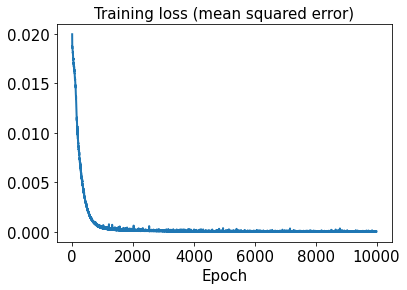

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

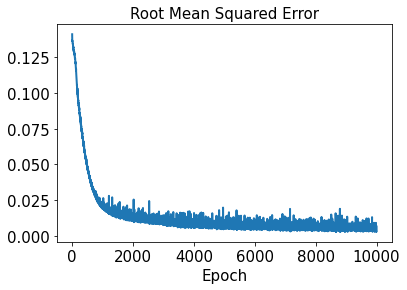

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.0013766414


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.0022411132


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

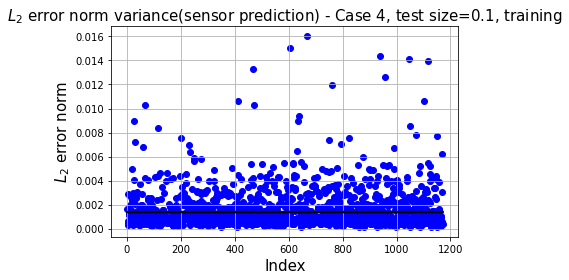

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 4, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

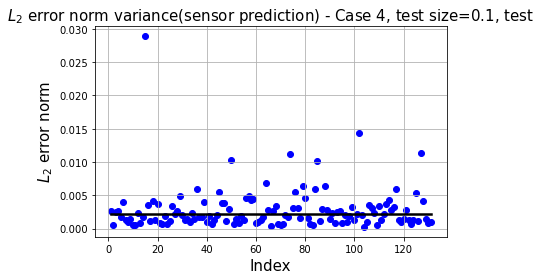

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 4, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
30/30 [==============================] - 1s 10ms/step - loss: 0.0108 - rmse: 0.1031
Epoch 2/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0095 - rmse: 0.0966
Epoch 3/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0850
Epoch 4/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0832
Epoch 5/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0804
Epoch 6/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0775
Epoch 7/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0765
Epoch 8/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 9/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0745
Epoch 10/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0728
Epoch 11/10000
30/30 [======

30/30 [==============================] - 0s 5ms/step - loss: 8.8900e-04 - rmse: 0.0268
Epoch 85/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.7297e-04 - rmse: 0.0265
Epoch 86/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6080e-04 - rmse: 0.0263
Epoch 87/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.4477e-04 - rmse: 0.0260
Epoch 88/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.2906e-04 - rmse: 0.0257
Epoch 89/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.1613e-04 - rmse: 0.0254
Epoch 90/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.0192e-04 - rmse: 0.0252
Epoch 91/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.9152e-04 - rmse: 0.0250
Epoch 92/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.7904e-04 - rmse: 0.0247
Epoch 93/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.6478e-04 - rmse: 0.

30/30 [==============================] - 0s 5ms/step - loss: 3.6524e-04 - rmse: 0.0141
Epoch 164/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6146e-04 - rmse: 0.0140
Epoch 165/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5919e-04 - rmse: 0.0139
Epoch 166/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5719e-04 - rmse: 0.0138
Epoch 167/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5416e-04 - rmse: 0.0137
Epoch 168/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5125e-04 - rmse: 0.0136
Epoch 169/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5049e-04 - rmse: 0.0136
Epoch 170/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4746e-04 - rmse: 0.0135
Epoch 171/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4571e-04 - rmse: 0.0134
Epoch 172/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4276e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 2.4647e-04 - rmse: 0.0096
Epoch 243/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4566e-04 - rmse: 0.0095
Epoch 244/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4467e-04 - rmse: 0.0095
Epoch 245/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4560e-04 - rmse: 0.0096
Epoch 246/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4349e-04 - rmse: 0.0095
Epoch 247/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4219e-04 - rmse: 0.0094
Epoch 248/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4164e-04 - rmse: 0.0094
Epoch 249/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4085e-04 - rmse: 0.0093
Epoch 250/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4017e-04 - rmse: 0.0093
Epoch 251/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4001e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.9839e-04 - rmse: 0.0076
Epoch 322/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9693e-04 - rmse: 0.0075
Epoch 323/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9760e-04 - rmse: 0.0075
Epoch 324/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9755e-04 - rmse: 0.0076
Epoch 325/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9720e-04 - rmse: 0.0075
Epoch 326/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9640e-04 - rmse: 0.0075
Epoch 327/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9522e-04 - rmse: 0.0074
Epoch 328/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9539e-04 - rmse: 0.0075
Epoch 329/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9508e-04 - rmse: 0.0074
Epoch 330/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9378e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.6934e-04 - rmse: 0.0065
Epoch 401/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6917e-04 - rmse: 0.0065
Epoch 402/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6913e-04 - rmse: 0.0065
Epoch 403/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6873e-04 - rmse: 0.0064
Epoch 404/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6794e-04 - rmse: 0.0064
Epoch 405/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6730e-04 - rmse: 0.0064
Epoch 406/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6759e-04 - rmse: 0.0064
Epoch 407/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6716e-04 - rmse: 0.0064
Epoch 408/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6718e-04 - rmse: 0.0064
Epoch 409/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6664e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.4872e-04 - rmse: 0.0057
Epoch 480/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4920e-04 - rmse: 0.0058
Epoch 481/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4826e-04 - rmse: 0.0057
Epoch 482/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4832e-04 - rmse: 0.0057
Epoch 483/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4839e-04 - rmse: 0.0057
Epoch 484/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4804e-04 - rmse: 0.0057
Epoch 485/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4780e-04 - rmse: 0.0057
Epoch 486/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4798e-04 - rmse: 0.0057
Epoch 487/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4729e-04 - rmse: 0.0057
Epoch 488/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4711e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.3324e-04 - rmse: 0.0052
Epoch 559/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3334e-04 - rmse: 0.0053
Epoch 560/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3326e-04 - rmse: 0.0053
Epoch 561/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3397e-04 - rmse: 0.0053
Epoch 562/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3293e-04 - rmse: 0.0053
Epoch 563/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3249e-04 - rmse: 0.0052
Epoch 564/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3236e-04 - rmse: 0.0052
Epoch 565/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3321e-04 - rmse: 0.0053
Epoch 566/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3307e-04 - rmse: 0.0053
Epoch 567/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3238e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.2145e-04 - rmse: 0.0049
Epoch 638/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2109e-04 - rmse: 0.0049
Epoch 639/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2097e-04 - rmse: 0.0049
Epoch 640/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2091e-04 - rmse: 0.0049
Epoch 641/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2088e-04 - rmse: 0.0049
Epoch 642/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2097e-04 - rmse: 0.0049
Epoch 643/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2058e-04 - rmse: 0.0049
Epoch 644/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2065e-04 - rmse: 0.0049
Epoch 645/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2128e-04 - rmse: 0.0050
Epoch 646/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2040e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.1181e-04 - rmse: 0.0047
Epoch 717/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1146e-04 - rmse: 0.0046
Epoch 718/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1186e-04 - rmse: 0.0047
Epoch 719/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1232e-04 - rmse: 0.0047
Epoch 720/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1219e-04 - rmse: 0.0047
Epoch 721/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1139e-04 - rmse: 0.0047
Epoch 722/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1079e-04 - rmse: 0.0046
Epoch 723/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1086e-04 - rmse: 0.0046
Epoch 724/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1079e-04 - rmse: 0.0046
Epoch 725/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1116e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.0398e-04 - rmse: 0.0045
Epoch 796/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0371e-04 - rmse: 0.0045
Epoch 797/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0352e-04 - rmse: 0.0044
Epoch 798/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0349e-04 - rmse: 0.0044
Epoch 799/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0350e-04 - rmse: 0.0045
Epoch 800/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0301e-04 - rmse: 0.0044
Epoch 801/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0327e-04 - rmse: 0.0044
Epoch 802/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0309e-04 - rmse: 0.0044
Epoch 803/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0319e-04 - rmse: 0.0044
Epoch 804/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0349e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 9.7314e-05 - rmse: 0.0043
Epoch 875/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.7810e-05 - rmse: 0.0044
Epoch 876/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.7161e-05 - rmse: 0.0043
Epoch 877/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.6694e-05 - rmse: 0.0043
Epoch 878/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.6786e-05 - rmse: 0.0043
Epoch 879/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.6105e-05 - rmse: 0.0042
Epoch 880/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.6114e-05 - rmse: 0.0042
Epoch 881/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.6556e-05 - rmse: 0.0043
Epoch 882/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.6316e-05 - rmse: 0.0043
Epoch 883/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.6465e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 9.1492e-05 - rmse: 0.0041
Epoch 954/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.1358e-05 - rmse: 0.0041
Epoch 955/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.0888e-05 - rmse: 0.0041
Epoch 956/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.0854e-05 - rmse: 0.0041
Epoch 957/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.0993e-05 - rmse: 0.0041
Epoch 958/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.1049e-05 - rmse: 0.0041
Epoch 959/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.0941e-05 - rmse: 0.0041
Epoch 960/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.0461e-05 - rmse: 0.0041
Epoch 961/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.0456e-05 - rmse: 0.0041
Epoch 962/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.1029e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 8.6424e-05 - rmse: 0.0040
Epoch 1033/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6378e-05 - rmse: 0.0040
Epoch 1034/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6147e-05 - rmse: 0.0040
Epoch 1035/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.5989e-05 - rmse: 0.0040
Epoch 1036/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6521e-05 - rmse: 0.0040
Epoch 1037/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6178e-05 - rmse: 0.0040
Epoch 1038/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.5910e-05 - rmse: 0.0040
Epoch 1039/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6214e-05 - rmse: 0.0040
Epoch 1040/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6413e-05 - rmse: 0.0040
Epoch 1041/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.5

30/30 [==============================] - 0s 5ms/step - loss: 8.2127e-05 - rmse: 0.0039
Epoch 1111/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.1606e-05 - rmse: 0.0038
Epoch 1112/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.1863e-05 - rmse: 0.0039
Epoch 1113/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.2297e-05 - rmse: 0.0039
Epoch 1114/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.2450e-05 - rmse: 0.0039
Epoch 1115/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.2054e-05 - rmse: 0.0039
Epoch 1116/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.1779e-05 - rmse: 0.0039
Epoch 1117/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.1847e-05 - rmse: 0.0039
Epoch 1118/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.1876e-05 - rmse: 0.0039
Epoch 1119/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.1

30/30 [==============================] - 0s 5ms/step - loss: 7.8803e-05 - rmse: 0.0038
Epoch 1189/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8222e-05 - rmse: 0.0037
Epoch 1190/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8653e-05 - rmse: 0.0038
Epoch 1191/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8206e-05 - rmse: 0.0038
Epoch 1192/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8096e-05 - rmse: 0.0037
Epoch 1193/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8978e-05 - rmse: 0.0039
Epoch 1194/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8855e-05 - rmse: 0.0039
Epoch 1195/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8133e-05 - rmse: 0.0038
Epoch 1196/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.7917e-05 - rmse: 0.0037
Epoch 1197/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8

30/30 [==============================] - 0s 5ms/step - loss: 7.5085e-05 - rmse: 0.0037
Epoch 1267/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.4958e-05 - rmse: 0.0037
Epoch 1268/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.4868e-05 - rmse: 0.0036
Epoch 1269/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.5771e-05 - rmse: 0.0038
Epoch 1270/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.4960e-05 - rmse: 0.0037
Epoch 1271/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.5371e-05 - rmse: 0.0037
Epoch 1272/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.4958e-05 - rmse: 0.0037
Epoch 1273/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.5310e-05 - rmse: 0.0037
Epoch 1274/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.4567e-05 - rmse: 0.0036
Epoch 1275/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.4

30/30 [==============================] - 0s 5ms/step - loss: 7.2662e-05 - rmse: 0.0036
Epoch 1345/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.2142e-05 - rmse: 0.0036
Epoch 1346/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.2189e-05 - rmse: 0.0036
Epoch 1347/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.2693e-05 - rmse: 0.0037
Epoch 1348/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.2336e-05 - rmse: 0.0036
Epoch 1349/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.2199e-05 - rmse: 0.0036
Epoch 1350/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.2531e-05 - rmse: 0.0037
Epoch 1351/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.2496e-05 - rmse: 0.0037
Epoch 1352/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.2175e-05 - rmse: 0.0036
Epoch 1353/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.2

30/30 [==============================] - 0s 5ms/step - loss: 6.9358e-05 - rmse: 0.0035
Epoch 1423/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.0107e-05 - rmse: 0.0036
Epoch 1424/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.9829e-05 - rmse: 0.0035
Epoch 1425/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.9295e-05 - rmse: 0.0035
Epoch 1426/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.9517e-05 - rmse: 0.0035
Epoch 1427/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.9395e-05 - rmse: 0.0035
Epoch 1428/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.9381e-05 - rmse: 0.0035
Epoch 1429/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.9260e-05 - rmse: 0.0035
Epoch 1430/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.9537e-05 - rmse: 0.0035
Epoch 1431/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.9

30/30 [==============================] - 0s 5ms/step - loss: 6.7314e-05 - rmse: 0.0034
Epoch 1501/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.7207e-05 - rmse: 0.0034
Epoch 1502/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.7044e-05 - rmse: 0.0034
Epoch 1503/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.6999e-05 - rmse: 0.0034
Epoch 1504/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.7275e-05 - rmse: 0.0034
Epoch 1505/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.7776e-05 - rmse: 0.0035
Epoch 1506/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.8021e-05 - rmse: 0.0035
Epoch 1507/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.6929e-05 - rmse: 0.0034
Epoch 1508/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.6932e-05 - rmse: 0.0034
Epoch 1509/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.7

30/30 [==============================] - 0s 5ms/step - loss: 6.5453e-05 - rmse: 0.0034
Epoch 1579/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5765e-05 - rmse: 0.0034
Epoch 1580/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5675e-05 - rmse: 0.0034
Epoch 1581/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5284e-05 - rmse: 0.0034
Epoch 1582/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5669e-05 - rmse: 0.0034
Epoch 1583/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5031e-05 - rmse: 0.0033
Epoch 1584/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5346e-05 - rmse: 0.0034
Epoch 1585/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5264e-05 - rmse: 0.0034
Epoch 1586/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5469e-05 - rmse: 0.0034
Epoch 1587/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5

30/30 [==============================] - 0s 5ms/step - loss: 6.3592e-05 - rmse: 0.0033
Epoch 1657/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.3690e-05 - rmse: 0.0034
Epoch 1658/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.3538e-05 - rmse: 0.0033
Epoch 1659/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.3490e-05 - rmse: 0.0033
Epoch 1660/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.4397e-05 - rmse: 0.0035
Epoch 1661/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.4340e-05 - rmse: 0.0035
Epoch 1662/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.3513e-05 - rmse: 0.0033
Epoch 1663/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.3381e-05 - rmse: 0.0033
Epoch 1664/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.3409e-05 - rmse: 0.0033
Epoch 1665/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.3

30/30 [==============================] - 0s 5ms/step - loss: 6.1837e-05 - rmse: 0.0033
Epoch 1735/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1631e-05 - rmse: 0.0032
Epoch 1736/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1952e-05 - rmse: 0.0033
Epoch 1737/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1687e-05 - rmse: 0.0033
Epoch 1738/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1388e-05 - rmse: 0.0032
Epoch 1739/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1623e-05 - rmse: 0.0032
Epoch 1740/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1529e-05 - rmse: 0.0032
Epoch 1741/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1758e-05 - rmse: 0.0033
Epoch 1742/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1404e-05 - rmse: 0.0032
Epoch 1743/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1

30/30 [==============================] - 0s 5ms/step - loss: 5.9903e-05 - rmse: 0.0032
Epoch 1813/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0335e-05 - rmse: 0.0032
Epoch 1814/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0764e-05 - rmse: 0.0033
Epoch 1815/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0284e-05 - rmse: 0.0032
Epoch 1816/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0112e-05 - rmse: 0.0032
Epoch 1817/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1158e-05 - rmse: 0.0034
Epoch 1818/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0533e-05 - rmse: 0.0033
Epoch 1819/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0559e-05 - rmse: 0.0033
Epoch 1820/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0071e-05 - rmse: 0.0032
Epoch 1821/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.9

30/30 [==============================] - 0s 5ms/step - loss: 5.9153e-05 - rmse: 0.0032
Epoch 1891/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.9072e-05 - rmse: 0.0032
Epoch 1892/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8474e-05 - rmse: 0.0031
Epoch 1893/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8880e-05 - rmse: 0.0032
Epoch 1894/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8475e-05 - rmse: 0.0031
Epoch 1895/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8689e-05 - rmse: 0.0031
Epoch 1896/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8384e-05 - rmse: 0.0031
Epoch 1897/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8332e-05 - rmse: 0.0031
Epoch 1898/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8386e-05 - rmse: 0.0031
Epoch 1899/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8

30/30 [==============================] - 0s 5ms/step - loss: 5.7860e-05 - rmse: 0.0032
Epoch 1969/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7507e-05 - rmse: 0.0031
Epoch 1970/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7583e-05 - rmse: 0.0031
Epoch 1971/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7891e-05 - rmse: 0.0032
Epoch 1972/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7815e-05 - rmse: 0.0032
Epoch 1973/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7519e-05 - rmse: 0.0031
Epoch 1974/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7421e-05 - rmse: 0.0031
Epoch 1975/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7184e-05 - rmse: 0.0031
Epoch 1976/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7424e-05 - rmse: 0.0031
Epoch 1977/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7

30/30 [==============================] - 0s 5ms/step - loss: 5.6121e-05 - rmse: 0.0030
Epoch 2047/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6253e-05 - rmse: 0.0031
Epoch 2048/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6564e-05 - rmse: 0.0031
Epoch 2049/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5836e-05 - rmse: 0.0030
Epoch 2050/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5974e-05 - rmse: 0.0030
Epoch 2051/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6122e-05 - rmse: 0.0030
Epoch 2052/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6450e-05 - rmse: 0.0031
Epoch 2053/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6297e-05 - rmse: 0.0031
Epoch 2054/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5962e-05 - rmse: 0.0030
Epoch 2055/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5

30/30 [==============================] - 0s 5ms/step - loss: 5.5395e-05 - rmse: 0.0031
Epoch 2125/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5497e-05 - rmse: 0.0031
Epoch 2126/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5152e-05 - rmse: 0.0030
Epoch 2127/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5044e-05 - rmse: 0.0030
Epoch 2128/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4913e-05 - rmse: 0.0030
Epoch 2129/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4793e-05 - rmse: 0.0030
Epoch 2130/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5138e-05 - rmse: 0.0030
Epoch 2131/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5369e-05 - rmse: 0.0031
Epoch 2132/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5087e-05 - rmse: 0.0030
Epoch 2133/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4

30/30 [==============================] - 0s 5ms/step - loss: 5.4564e-05 - rmse: 0.0031
Epoch 2203/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4874e-05 - rmse: 0.0031
Epoch 2204/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4673e-05 - rmse: 0.0031
Epoch 2205/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3848e-05 - rmse: 0.0029
Epoch 2206/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4178e-05 - rmse: 0.0030
Epoch 2207/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3754e-05 - rmse: 0.0029
Epoch 2208/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3969e-05 - rmse: 0.0030
Epoch 2209/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3830e-05 - rmse: 0.0029
Epoch 2210/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3638e-05 - rmse: 0.0029
Epoch 2211/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4

30/30 [==============================] - 0s 5ms/step - loss: 5.3533e-05 - rmse: 0.0030
Epoch 2281/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4858e-05 - rmse: 0.0032
Epoch 2282/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3738e-05 - rmse: 0.0030
Epoch 2283/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3434e-05 - rmse: 0.0030
Epoch 2284/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3397e-05 - rmse: 0.0030
Epoch 2285/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2910e-05 - rmse: 0.0029
Epoch 2286/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3105e-05 - rmse: 0.0029
Epoch 2287/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3342e-05 - rmse: 0.0030
Epoch 2288/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3054e-05 - rmse: 0.0029
Epoch 2289/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3

30/30 [==============================] - 0s 5ms/step - loss: 5.2322e-05 - rmse: 0.0029
Epoch 2359/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2339e-05 - rmse: 0.0029
Epoch 2360/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2342e-05 - rmse: 0.0029
Epoch 2361/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3214e-05 - rmse: 0.0031
Epoch 2362/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3102e-05 - rmse: 0.0031
Epoch 2363/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2453e-05 - rmse: 0.0029
Epoch 2364/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2224e-05 - rmse: 0.0029
Epoch 2365/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2773e-05 - rmse: 0.0030
Epoch 2366/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2424e-05 - rmse: 0.0029
Epoch 2367/10000
30/30 [==============================] - 0s 6ms/step - loss: 5.2

30/30 [==============================] - 0s 5ms/step - loss: 5.1945e-05 - rmse: 0.0030
Epoch 2437/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1612e-05 - rmse: 0.0029
Epoch 2438/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1935e-05 - rmse: 0.0030
Epoch 2439/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1747e-05 - rmse: 0.0029
Epoch 2440/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1115e-05 - rmse: 0.0028
Epoch 2441/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1320e-05 - rmse: 0.0029
Epoch 2442/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1585e-05 - rmse: 0.0029
Epoch 2443/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2096e-05 - rmse: 0.0030
Epoch 2444/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1567e-05 - rmse: 0.0029
Epoch 2445/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1

30/30 [==============================] - 0s 5ms/step - loss: 5.0653e-05 - rmse: 0.0028
Epoch 2515/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0615e-05 - rmse: 0.0028
Epoch 2516/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0666e-05 - rmse: 0.0028
Epoch 2517/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0417e-05 - rmse: 0.0028
Epoch 2518/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0700e-05 - rmse: 0.0029
Epoch 2519/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1212e-05 - rmse: 0.0029
Epoch 2520/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0383e-05 - rmse: 0.0028
Epoch 2521/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0311e-05 - rmse: 0.0028
Epoch 2522/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0529e-05 - rmse: 0.0028
Epoch 2523/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1

30/30 [==============================] - 0s 5ms/step - loss: 5.0130e-05 - rmse: 0.0029
Epoch 2593/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0056e-05 - rmse: 0.0028
Epoch 2594/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9933e-05 - rmse: 0.0028
Epoch 2595/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9672e-05 - rmse: 0.0028
Epoch 2596/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9709e-05 - rmse: 0.0028
Epoch 2597/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9900e-05 - rmse: 0.0028
Epoch 2598/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9859e-05 - rmse: 0.0028
Epoch 2599/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9895e-05 - rmse: 0.0028
Epoch 2600/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0297e-05 - rmse: 0.0029
Epoch 2601/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9

30/30 [==============================] - 0s 5ms/step - loss: 5.0224e-05 - rmse: 0.0030
Epoch 2671/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9218e-05 - rmse: 0.0028
Epoch 2672/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9422e-05 - rmse: 0.0028
Epoch 2673/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9324e-05 - rmse: 0.0028
Epoch 2674/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9194e-05 - rmse: 0.0028
Epoch 2675/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8937e-05 - rmse: 0.0027
Epoch 2676/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8782e-05 - rmse: 0.0027
Epoch 2677/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8953e-05 - rmse: 0.0027
Epoch 2678/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9503e-05 - rmse: 0.0028
Epoch 2679/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9

30/30 [==============================] - 0s 5ms/step - loss: 4.9265e-05 - rmse: 0.0029
Epoch 2749/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9062e-05 - rmse: 0.0028
Epoch 2750/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8687e-05 - rmse: 0.0028
Epoch 2751/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8818e-05 - rmse: 0.0028
Epoch 2752/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8484e-05 - rmse: 0.0027
Epoch 2753/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8492e-05 - rmse: 0.0027
Epoch 2754/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8816e-05 - rmse: 0.0028
Epoch 2755/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8557e-05 - rmse: 0.0028
Epoch 2756/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8457e-05 - rmse: 0.0027
Epoch 2757/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8

30/30 [==============================] - 0s 5ms/step - loss: 4.8192e-05 - rmse: 0.0028
Epoch 2827/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8128e-05 - rmse: 0.0028
Epoch 2828/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8460e-05 - rmse: 0.0028
Epoch 2829/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7943e-05 - rmse: 0.0027
Epoch 2830/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8002e-05 - rmse: 0.0027
Epoch 2831/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8162e-05 - rmse: 0.0028
Epoch 2832/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7777e-05 - rmse: 0.0027
Epoch 2833/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7858e-05 - rmse: 0.0027
Epoch 2834/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7855e-05 - rmse: 0.0027
Epoch 2835/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7

30/30 [==============================] - 0s 5ms/step - loss: 4.7294e-05 - rmse: 0.0027
Epoch 2905/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7564e-05 - rmse: 0.0027
Epoch 2906/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7489e-05 - rmse: 0.0027
Epoch 2907/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7192e-05 - rmse: 0.0027
Epoch 2908/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7206e-05 - rmse: 0.0027
Epoch 2909/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7649e-05 - rmse: 0.0028
Epoch 2910/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7844e-05 - rmse: 0.0028
Epoch 2911/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7217e-05 - rmse: 0.0027
Epoch 2912/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7025e-05 - rmse: 0.0026
Epoch 2913/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7

30/30 [==============================] - 0s 5ms/step - loss: 4.6959e-05 - rmse: 0.0027
Epoch 2983/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6784e-05 - rmse: 0.0027
Epoch 2984/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6840e-05 - rmse: 0.0027
Epoch 2985/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6871e-05 - rmse: 0.0027
Epoch 2986/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7460e-05 - rmse: 0.0028
Epoch 2987/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7158e-05 - rmse: 0.0028
Epoch 2988/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7147e-05 - rmse: 0.0027
Epoch 2989/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7431e-05 - rmse: 0.0028
Epoch 2990/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6888e-05 - rmse: 0.0027
Epoch 2991/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6

30/30 [==============================] - 0s 5ms/step - loss: 4.6460e-05 - rmse: 0.0027
Epoch 3061/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6845e-05 - rmse: 0.0028
Epoch 3062/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6785e-05 - rmse: 0.0028
Epoch 3063/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6906e-05 - rmse: 0.0028
Epoch 3064/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7007e-05 - rmse: 0.0028
Epoch 3065/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6582e-05 - rmse: 0.0027
Epoch 3066/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6189e-05 - rmse: 0.0026
Epoch 3067/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6539e-05 - rmse: 0.0027
Epoch 3068/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6386e-05 - rmse: 0.0027
Epoch 3069/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6

30/30 [==============================] - 0s 5ms/step - loss: 4.5808e-05 - rmse: 0.0026
Epoch 3139/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5821e-05 - rmse: 0.0026
Epoch 3140/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5900e-05 - rmse: 0.0027
Epoch 3141/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5894e-05 - rmse: 0.0027
Epoch 3142/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5727e-05 - rmse: 0.0026
Epoch 3143/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5899e-05 - rmse: 0.0027
Epoch 3144/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6084e-05 - rmse: 0.0027
Epoch 3145/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5926e-05 - rmse: 0.0027
Epoch 3146/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5726e-05 - rmse: 0.0026
Epoch 3147/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6

30/30 [==============================] - 0s 5ms/step - loss: 4.5358e-05 - rmse: 0.0026
Epoch 3217/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5277e-05 - rmse: 0.0026
Epoch 3218/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5276e-05 - rmse: 0.0026
Epoch 3219/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5475e-05 - rmse: 0.0027
Epoch 3220/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5289e-05 - rmse: 0.0026
Epoch 3221/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5302e-05 - rmse: 0.0026
Epoch 3222/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5309e-05 - rmse: 0.0026
Epoch 3223/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5886e-05 - rmse: 0.0027
Epoch 3224/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5387e-05 - rmse: 0.0026
Epoch 3225/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5

30/30 [==============================] - 0s 5ms/step - loss: 4.5576e-05 - rmse: 0.0027
Epoch 3295/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6208e-05 - rmse: 0.0028
Epoch 3296/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5311e-05 - rmse: 0.0027
Epoch 3297/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5242e-05 - rmse: 0.0027
Epoch 3298/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5004e-05 - rmse: 0.0026
Epoch 3299/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4803e-05 - rmse: 0.0026
Epoch 3300/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4851e-05 - rmse: 0.0026
Epoch 3301/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5339e-05 - rmse: 0.0027
Epoch 3302/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4867e-05 - rmse: 0.0026
Epoch 3303/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5

30/30 [==============================] - 0s 5ms/step - loss: 4.4949e-05 - rmse: 0.0027
Epoch 3373/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4769e-05 - rmse: 0.0026
Epoch 3374/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4671e-05 - rmse: 0.0026
Epoch 3375/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4529e-05 - rmse: 0.0026
Epoch 3376/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4812e-05 - rmse: 0.0027
Epoch 3377/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5352e-05 - rmse: 0.0028
Epoch 3378/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5925e-05 - rmse: 0.0029
Epoch 3379/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5121e-05 - rmse: 0.0027
Epoch 3380/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4415e-05 - rmse: 0.0026
Epoch 3381/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4

30/30 [==============================] - 0s 5ms/step - loss: 4.4195e-05 - rmse: 0.0026
Epoch 3451/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4205e-05 - rmse: 0.0026
Epoch 3452/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3983e-05 - rmse: 0.0026
Epoch 3453/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4097e-05 - rmse: 0.0026
Epoch 3454/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4202e-05 - rmse: 0.0026
Epoch 3455/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4758e-05 - rmse: 0.0027
Epoch 3456/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5282e-05 - rmse: 0.0028
Epoch 3457/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4996e-05 - rmse: 0.0027
Epoch 3458/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4787e-05 - rmse: 0.0027
Epoch 3459/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4

30/30 [==============================] - 0s 5ms/step - loss: 4.3736e-05 - rmse: 0.0026
Epoch 3529/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3532e-05 - rmse: 0.0025
Epoch 3530/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3512e-05 - rmse: 0.0025
Epoch 3531/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3666e-05 - rmse: 0.0026
Epoch 3532/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3748e-05 - rmse: 0.0026
Epoch 3533/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4134e-05 - rmse: 0.0026
Epoch 3534/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4574e-05 - rmse: 0.0027
Epoch 3535/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3846e-05 - rmse: 0.0026
Epoch 3536/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3957e-05 - rmse: 0.0026
Epoch 3537/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3

30/30 [==============================] - 0s 5ms/step - loss: 4.3352e-05 - rmse: 0.0025
Epoch 3607/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3249e-05 - rmse: 0.0025
Epoch 3608/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3194e-05 - rmse: 0.0025
Epoch 3609/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3133e-05 - rmse: 0.0025
Epoch 3610/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3561e-05 - rmse: 0.0026
Epoch 3611/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3797e-05 - rmse: 0.0026
Epoch 3612/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4136e-05 - rmse: 0.0027
Epoch 3613/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3628e-05 - rmse: 0.0026
Epoch 3614/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3619e-05 - rmse: 0.0026
Epoch 3615/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3

30/30 [==============================] - 0s 5ms/step - loss: 4.2954e-05 - rmse: 0.0025
Epoch 3685/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3166e-05 - rmse: 0.0026
Epoch 3686/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3117e-05 - rmse: 0.0026
Epoch 3687/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2972e-05 - rmse: 0.0025
Epoch 3688/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2858e-05 - rmse: 0.0025
Epoch 3689/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3360e-05 - rmse: 0.0026
Epoch 3690/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3434e-05 - rmse: 0.0026
Epoch 3691/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2964e-05 - rmse: 0.0025
Epoch 3692/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3144e-05 - rmse: 0.0026
Epoch 3693/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3

30/30 [==============================] - 0s 5ms/step - loss: 4.3086e-05 - rmse: 0.0026
Epoch 3763/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2642e-05 - rmse: 0.0025
Epoch 3764/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2746e-05 - rmse: 0.0025
Epoch 3765/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2486e-05 - rmse: 0.0025
Epoch 3766/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2497e-05 - rmse: 0.0025
Epoch 3767/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2888e-05 - rmse: 0.0026
Epoch 3768/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3153e-05 - rmse: 0.0026
Epoch 3769/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2745e-05 - rmse: 0.0025
Epoch 3770/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2742e-05 - rmse: 0.0025
Epoch 3771/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2

30/30 [==============================] - 0s 5ms/step - loss: 4.2728e-05 - rmse: 0.0026
Epoch 3841/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2429e-05 - rmse: 0.0025
Epoch 3842/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1950e-05 - rmse: 0.0024
Epoch 3843/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2191e-05 - rmse: 0.0025
Epoch 3844/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2101e-05 - rmse: 0.0025
Epoch 3845/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2317e-05 - rmse: 0.0025
Epoch 3846/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2454e-05 - rmse: 0.0025
Epoch 3847/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2782e-05 - rmse: 0.0026
Epoch 3848/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2344e-05 - rmse: 0.0025
Epoch 3849/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2

30/30 [==============================] - 0s 5ms/step - loss: 4.2203e-05 - rmse: 0.0025
Epoch 3919/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2770e-05 - rmse: 0.0026
Epoch 3920/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2556e-05 - rmse: 0.0026
Epoch 3921/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2527e-05 - rmse: 0.0026
Epoch 3922/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2355e-05 - rmse: 0.0026
Epoch 3923/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2096e-05 - rmse: 0.0025
Epoch 3924/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2110e-05 - rmse: 0.0025
Epoch 3925/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2112e-05 - rmse: 0.0025
Epoch 3926/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2044e-05 - rmse: 0.0025
Epoch 3927/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1

30/30 [==============================] - 0s 5ms/step - loss: 4.2032e-05 - rmse: 0.0025
Epoch 3997/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2609e-05 - rmse: 0.0027
Epoch 3998/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2166e-05 - rmse: 0.0026
Epoch 3999/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1752e-05 - rmse: 0.0025
Epoch 4000/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1502e-05 - rmse: 0.0024
Epoch 4001/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1633e-05 - rmse: 0.0025
Epoch 4002/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1617e-05 - rmse: 0.0025
Epoch 4003/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2274e-05 - rmse: 0.0026
Epoch 4004/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2581e-05 - rmse: 0.0027
Epoch 4005/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2

30/30 [==============================] - 0s 5ms/step - loss: 4.2024e-05 - rmse: 0.0026
Epoch 4075/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1451e-05 - rmse: 0.0025
Epoch 4076/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1227e-05 - rmse: 0.0024
Epoch 4077/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1662e-05 - rmse: 0.0025
Epoch 4078/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1344e-05 - rmse: 0.0025
Epoch 4079/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1321e-05 - rmse: 0.0025
Epoch 4080/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1585e-05 - rmse: 0.0025
Epoch 4081/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1429e-05 - rmse: 0.0025
Epoch 4082/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1419e-05 - rmse: 0.0025
Epoch 4083/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1

30/30 [==============================] - 0s 5ms/step - loss: 4.1102e-05 - rmse: 0.0024
Epoch 4153/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1001e-05 - rmse: 0.0024
Epoch 4154/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1636e-05 - rmse: 0.0026
Epoch 4155/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1326e-05 - rmse: 0.0025
Epoch 4156/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1250e-05 - rmse: 0.0025
Epoch 4157/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1652e-05 - rmse: 0.0026
Epoch 4158/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2299e-05 - rmse: 0.0027
Epoch 4159/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1318e-05 - rmse: 0.0025
Epoch 4160/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1662e-05 - rmse: 0.0026
Epoch 4161/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1

30/30 [==============================] - 0s 5ms/step - loss: 4.1136e-05 - rmse: 0.0025
Epoch 4231/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1189e-05 - rmse: 0.0025
Epoch 4232/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1038e-05 - rmse: 0.0025
Epoch 4233/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1181e-05 - rmse: 0.0025
Epoch 4234/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1701e-05 - rmse: 0.0026
Epoch 4235/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1470e-05 - rmse: 0.0026
Epoch 4236/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0875e-05 - rmse: 0.0025
Epoch 4237/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0784e-05 - rmse: 0.0024
Epoch 4238/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1060e-05 - rmse: 0.0025
Epoch 4239/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0

30/30 [==============================] - 0s 5ms/step - loss: 4.1219e-05 - rmse: 0.0026
Epoch 4309/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1185e-05 - rmse: 0.0026
Epoch 4310/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1100e-05 - rmse: 0.0025
Epoch 4311/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0795e-05 - rmse: 0.0025
Epoch 4312/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0630e-05 - rmse: 0.0024
Epoch 4313/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0829e-05 - rmse: 0.0025
Epoch 4314/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0747e-05 - rmse: 0.0025
Epoch 4315/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0753e-05 - rmse: 0.0025
Epoch 4316/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0536e-05 - rmse: 0.0024
Epoch 4317/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0

30/30 [==============================] - 0s 5ms/step - loss: 4.0069e-05 - rmse: 0.0024
Epoch 4387/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0489e-05 - rmse: 0.0025
Epoch 4388/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0485e-05 - rmse: 0.0025
Epoch 4389/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0466e-05 - rmse: 0.0025
Epoch 4390/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0676e-05 - rmse: 0.0025
Epoch 4391/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0375e-05 - rmse: 0.0024
Epoch 4392/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0791e-05 - rmse: 0.0025
Epoch 4393/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0512e-05 - rmse: 0.0025
Epoch 4394/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0429e-05 - rmse: 0.0024
Epoch 4395/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0

30/30 [==============================] - 0s 5ms/step - loss: 3.9816e-05 - rmse: 0.0024
Epoch 4465/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9834e-05 - rmse: 0.0024
Epoch 4466/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9810e-05 - rmse: 0.0024
Epoch 4467/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9993e-05 - rmse: 0.0024
Epoch 4468/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0139e-05 - rmse: 0.0024
Epoch 4469/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0015e-05 - rmse: 0.0024
Epoch 4470/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0945e-05 - rmse: 0.0026
Epoch 4471/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0578e-05 - rmse: 0.0025
Epoch 4472/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0381e-05 - rmse: 0.0025
Epoch 4473/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0

30/30 [==============================] - 0s 5ms/step - loss: 4.0117e-05 - rmse: 0.0025
Epoch 4543/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0085e-05 - rmse: 0.0025
Epoch 4544/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0206e-05 - rmse: 0.0025
Epoch 4545/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0039e-05 - rmse: 0.0024
Epoch 4546/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9678e-05 - rmse: 0.0024
Epoch 4547/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0012e-05 - rmse: 0.0024
Epoch 4548/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0121e-05 - rmse: 0.0025
Epoch 4549/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9715e-05 - rmse: 0.0024
Epoch 4550/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0049e-05 - rmse: 0.0024
Epoch 4551/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9

30/30 [==============================] - 0s 5ms/step - loss: 3.9742e-05 - rmse: 0.0024
Epoch 4621/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9642e-05 - rmse: 0.0024
Epoch 4622/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9819e-05 - rmse: 0.0024
Epoch 4623/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0006e-05 - rmse: 0.0025
Epoch 4624/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0346e-05 - rmse: 0.0025
Epoch 4625/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0417e-05 - rmse: 0.0026
Epoch 4626/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0051e-05 - rmse: 0.0025
Epoch 4627/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9504e-05 - rmse: 0.0024
Epoch 4628/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0163e-05 - rmse: 0.0025
Epoch 4629/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9

30/30 [==============================] - 0s 5ms/step - loss: 3.9376e-05 - rmse: 0.0024
Epoch 4699/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9309e-05 - rmse: 0.0024
Epoch 4700/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9318e-05 - rmse: 0.0024
Epoch 4701/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9444e-05 - rmse: 0.0024
Epoch 4702/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9365e-05 - rmse: 0.0024
Epoch 4703/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0121e-05 - rmse: 0.0025
Epoch 4704/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9905e-05 - rmse: 0.0025
Epoch 4705/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9707e-05 - rmse: 0.0025
Epoch 4706/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9784e-05 - rmse: 0.0025
Epoch 4707/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9

30/30 [==============================] - 0s 5ms/step - loss: 3.9475e-05 - rmse: 0.0024
Epoch 4777/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9369e-05 - rmse: 0.0024
Epoch 4778/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9323e-05 - rmse: 0.0024
Epoch 4779/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9284e-05 - rmse: 0.0024
Epoch 4780/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9321e-05 - rmse: 0.0024
Epoch 4781/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9114e-05 - rmse: 0.0024
Epoch 4782/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9389e-05 - rmse: 0.0024
Epoch 4783/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9245e-05 - rmse: 0.0024
Epoch 4784/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9306e-05 - rmse: 0.0024
Epoch 4785/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9

30/30 [==============================] - 0s 5ms/step - loss: 3.8922e-05 - rmse: 0.0024
Epoch 4855/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8861e-05 - rmse: 0.0023
Epoch 4856/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9039e-05 - rmse: 0.0024
Epoch 4857/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8885e-05 - rmse: 0.0024
Epoch 4858/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8947e-05 - rmse: 0.0024
Epoch 4859/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8745e-05 - rmse: 0.0023
Epoch 4860/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9247e-05 - rmse: 0.0024
Epoch 4861/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9151e-05 - rmse: 0.0024
Epoch 4862/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8642e-05 - rmse: 0.0023
Epoch 4863/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8

30/30 [==============================] - 0s 4ms/step - loss: 3.9075e-05 - rmse: 0.0024
Epoch 4933/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8847e-05 - rmse: 0.0024
Epoch 4934/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8921e-05 - rmse: 0.0024
Epoch 4935/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.9180e-05 - rmse: 0.0024
Epoch 4936/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9342e-05 - rmse: 0.0025
Epoch 4937/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8801e-05 - rmse: 0.0024
Epoch 4938/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8919e-05 - rmse: 0.0024
Epoch 4939/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.8774e-05 - rmse: 0.0024
Epoch 4940/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.8493e-05 - rmse: 0.0023
Epoch 4941/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8

30/30 [==============================] - 0s 4ms/step - loss: 3.8613e-05 - rmse: 0.0024
Epoch 5011/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8383e-05 - rmse: 0.0023
Epoch 5012/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8589e-05 - rmse: 0.0024
Epoch 5013/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8611e-05 - rmse: 0.0024
Epoch 5014/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9141e-05 - rmse: 0.0025
Epoch 5015/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8614e-05 - rmse: 0.0024
Epoch 5016/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.8371e-05 - rmse: 0.0023
Epoch 5017/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.8473e-05 - rmse: 0.0023
Epoch 5018/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9377e-05 - rmse: 0.0025
Epoch 5019/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.9

30/30 [==============================] - 0s 5ms/step - loss: 3.8621e-05 - rmse: 0.0024
Epoch 5089/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.8658e-05 - rmse: 0.0024
Epoch 5090/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8164e-05 - rmse: 0.0023
Epoch 5091/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8668e-05 - rmse: 0.0024
Epoch 5092/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8693e-05 - rmse: 0.0024
Epoch 5093/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8466e-05 - rmse: 0.0024
Epoch 5094/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.8615e-05 - rmse: 0.0024
Epoch 5095/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8758e-05 - rmse: 0.0024
Epoch 5096/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8664e-05 - rmse: 0.0024
Epoch 5097/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.8

30/30 [==============================] - 0s 5ms/step - loss: 3.8406e-05 - rmse: 0.0024
Epoch 5167/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8613e-05 - rmse: 0.0024
Epoch 5168/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8435e-05 - rmse: 0.0024
Epoch 5169/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8134e-05 - rmse: 0.0023
Epoch 5170/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8319e-05 - rmse: 0.0024
Epoch 5171/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8175e-05 - rmse: 0.0023
Epoch 5172/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.8360e-05 - rmse: 0.0024
Epoch 5173/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9068e-05 - rmse: 0.0025
Epoch 5174/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8471e-05 - rmse: 0.0024
Epoch 5175/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8

30/30 [==============================] - 0s 5ms/step - loss: 3.8153e-05 - rmse: 0.0024
Epoch 5245/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7938e-05 - rmse: 0.0023
Epoch 5246/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8103e-05 - rmse: 0.0024
Epoch 5247/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0149e-05 - rmse: 0.0028
Epoch 5248/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1644e-05 - rmse: 0.0030
Epoch 5249/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9880e-05 - rmse: 0.0027
Epoch 5250/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8510e-05 - rmse: 0.0024
Epoch 5251/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8109e-05 - rmse: 0.0024
Epoch 5252/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7999e-05 - rmse: 0.0023
Epoch 5253/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7

30/30 [==============================] - 0s 5ms/step - loss: 3.8085e-05 - rmse: 0.0024
Epoch 5323/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8155e-05 - rmse: 0.0024
Epoch 5324/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7667e-05 - rmse: 0.0023
Epoch 5325/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7758e-05 - rmse: 0.0023
Epoch 5326/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7926e-05 - rmse: 0.0023
Epoch 5327/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8074e-05 - rmse: 0.0024
Epoch 5328/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8035e-05 - rmse: 0.0024
Epoch 5329/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7825e-05 - rmse: 0.0023
Epoch 5330/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8108e-05 - rmse: 0.0024
Epoch 5331/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7

30/30 [==============================] - 0s 5ms/step - loss: 3.7610e-05 - rmse: 0.0023
Epoch 5401/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7886e-05 - rmse: 0.0024
Epoch 5402/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7699e-05 - rmse: 0.0023
Epoch 5403/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7877e-05 - rmse: 0.0024
Epoch 5404/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8696e-05 - rmse: 0.0025
Epoch 5405/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.8102e-05 - rmse: 0.0024
Epoch 5406/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.8393e-05 - rmse: 0.0025
Epoch 5407/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8325e-05 - rmse: 0.0025
Epoch 5408/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7936e-05 - rmse: 0.0024
Epoch 5409/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7

30/30 [==============================] - 0s 4ms/step - loss: 3.7803e-05 - rmse: 0.0024
Epoch 5479/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7795e-05 - rmse: 0.0024
Epoch 5480/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7632e-05 - rmse: 0.0023
Epoch 5481/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7569e-05 - rmse: 0.0023
Epoch 5482/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7418e-05 - rmse: 0.0023
Epoch 5483/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7671e-05 - rmse: 0.0024
Epoch 5484/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8325e-05 - rmse: 0.0025
Epoch 5485/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7608e-05 - rmse: 0.0023
Epoch 5486/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7523e-05 - rmse: 0.0023
Epoch 5487/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7

30/30 [==============================] - 0s 5ms/step - loss: 3.7516e-05 - rmse: 0.0023
Epoch 5557/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7083e-05 - rmse: 0.0023
Epoch 5558/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7025e-05 - rmse: 0.0022
Epoch 5559/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7585e-05 - rmse: 0.0024
Epoch 5560/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7275e-05 - rmse: 0.0023
Epoch 5561/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7667e-05 - rmse: 0.0024
Epoch 5562/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7844e-05 - rmse: 0.0024
Epoch 5563/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7621e-05 - rmse: 0.0024
Epoch 5564/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7843e-05 - rmse: 0.0024
Epoch 5565/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7

30/30 [==============================] - 0s 5ms/step - loss: 3.7131e-05 - rmse: 0.0023
Epoch 5635/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6917e-05 - rmse: 0.0022
Epoch 5636/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6945e-05 - rmse: 0.0023
Epoch 5637/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7503e-05 - rmse: 0.0024
Epoch 5638/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7385e-05 - rmse: 0.0023
Epoch 5639/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7336e-05 - rmse: 0.0023
Epoch 5640/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7521e-05 - rmse: 0.0024
Epoch 5641/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7455e-05 - rmse: 0.0024
Epoch 5642/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7094e-05 - rmse: 0.0023
Epoch 5643/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7

30/30 [==============================] - 0s 5ms/step - loss: 3.7090e-05 - rmse: 0.0023
Epoch 5713/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6765e-05 - rmse: 0.0022
Epoch 5714/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7216e-05 - rmse: 0.0023
Epoch 5715/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7100e-05 - rmse: 0.0023
Epoch 5716/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7249e-05 - rmse: 0.0023
Epoch 5717/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7531e-05 - rmse: 0.0024
Epoch 5718/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6906e-05 - rmse: 0.0023
Epoch 5719/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6972e-05 - rmse: 0.0023
Epoch 5720/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7237e-05 - rmse: 0.0023
Epoch 5721/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7

30/30 [==============================] - 0s 5ms/step - loss: 3.6740e-05 - rmse: 0.0023
Epoch 5791/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7112e-05 - rmse: 0.0023
Epoch 5792/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6889e-05 - rmse: 0.0023
Epoch 5793/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7123e-05 - rmse: 0.0023
Epoch 5794/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7156e-05 - rmse: 0.0024
Epoch 5795/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8159e-05 - rmse: 0.0026
Epoch 5796/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8154e-05 - rmse: 0.0026
Epoch 5797/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7041e-05 - rmse: 0.0023
Epoch 5798/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6982e-05 - rmse: 0.0023
Epoch 5799/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.6642e-05 - rmse: 0.0023
Epoch 5869/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7188e-05 - rmse: 0.0024
Epoch 5870/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7390e-05 - rmse: 0.0024
Epoch 5871/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7030e-05 - rmse: 0.0024
Epoch 5872/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6993e-05 - rmse: 0.0023
Epoch 5873/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6933e-05 - rmse: 0.0023
Epoch 5874/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6727e-05 - rmse: 0.0023
Epoch 5875/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6876e-05 - rmse: 0.0023
Epoch 5876/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6520e-05 - rmse: 0.0022
Epoch 5877/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.6239e-05 - rmse: 0.0022
Epoch 5947/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6124e-05 - rmse: 0.0022
Epoch 5948/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6126e-05 - rmse: 0.0022
Epoch 5949/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6298e-05 - rmse: 0.0022
Epoch 5950/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6167e-05 - rmse: 0.0022
Epoch 5951/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6172e-05 - rmse: 0.0022
Epoch 5952/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6547e-05 - rmse: 0.0023
Epoch 5953/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6525e-05 - rmse: 0.0023
Epoch 5954/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6571e-05 - rmse: 0.0023
Epoch 5955/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.6575e-05 - rmse: 0.0023
Epoch 6025/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6403e-05 - rmse: 0.0023
Epoch 6026/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5927e-05 - rmse: 0.0022
Epoch 6027/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6083e-05 - rmse: 0.0022
Epoch 6028/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6134e-05 - rmse: 0.0022
Epoch 6029/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6169e-05 - rmse: 0.0022
Epoch 6030/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6064e-05 - rmse: 0.0022
Epoch 6031/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6348e-05 - rmse: 0.0023
Epoch 6032/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6425e-05 - rmse: 0.0023
Epoch 6033/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.7670e-05 - rmse: 0.0026
Epoch 6103/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.7186e-05 - rmse: 0.0025
Epoch 6104/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6687e-05 - rmse: 0.0024
Epoch 6105/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6372e-05 - rmse: 0.0023
Epoch 6106/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6572e-05 - rmse: 0.0023
Epoch 6107/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7170e-05 - rmse: 0.0025
Epoch 6108/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7088e-05 - rmse: 0.0024
Epoch 6109/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6505e-05 - rmse: 0.0023
Epoch 6110/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6474e-05 - rmse: 0.0023
Epoch 6111/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.6172e-05 - rmse: 0.0023
Epoch 6181/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6203e-05 - rmse: 0.0023
Epoch 6182/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6236e-05 - rmse: 0.0023
Epoch 6183/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6694e-05 - rmse: 0.0024
Epoch 6184/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6499e-05 - rmse: 0.0023
Epoch 6185/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6016e-05 - rmse: 0.0022
Epoch 6186/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5810e-05 - rmse: 0.0022
Epoch 6187/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5732e-05 - rmse: 0.0022
Epoch 6188/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5951e-05 - rmse: 0.0022
Epoch 6189/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6

30/30 [==============================] - 0s 4ms/step - loss: 3.6299e-05 - rmse: 0.0023
Epoch 6259/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6097e-05 - rmse: 0.0023
Epoch 6260/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6123e-05 - rmse: 0.0023
Epoch 6261/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6034e-05 - rmse: 0.0023
Epoch 6262/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5925e-05 - rmse: 0.0022
Epoch 6263/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5847e-05 - rmse: 0.0022
Epoch 6264/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6021e-05 - rmse: 0.0023
Epoch 6265/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6831e-05 - rmse: 0.0024
Epoch 6266/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6278e-05 - rmse: 0.0023
Epoch 6267/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.6138e-05 - rmse: 0.0023
Epoch 6337/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5808e-05 - rmse: 0.0022
Epoch 6338/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6151e-05 - rmse: 0.0023
Epoch 6339/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6033e-05 - rmse: 0.0023
Epoch 6340/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5803e-05 - rmse: 0.0022
Epoch 6341/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5846e-05 - rmse: 0.0023
Epoch 6342/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5604e-05 - rmse: 0.0022
Epoch 6343/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5477e-05 - rmse: 0.0022
Epoch 6344/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5909e-05 - rmse: 0.0023
Epoch 6345/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.6292e-05 - rmse: 0.0024
Epoch 6415/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5990e-05 - rmse: 0.0023
Epoch 6416/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5777e-05 - rmse: 0.0023
Epoch 6417/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5653e-05 - rmse: 0.0022
Epoch 6418/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5478e-05 - rmse: 0.0022
Epoch 6419/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5523e-05 - rmse: 0.0022
Epoch 6420/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5717e-05 - rmse: 0.0022
Epoch 6421/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5637e-05 - rmse: 0.0022
Epoch 6422/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5823e-05 - rmse: 0.0023
Epoch 6423/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6

30/30 [==============================] - 0s 4ms/step - loss: 3.5620e-05 - rmse: 0.0022
Epoch 6493/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5538e-05 - rmse: 0.0022
Epoch 6494/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5790e-05 - rmse: 0.0023
Epoch 6495/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6006e-05 - rmse: 0.0023
Epoch 6496/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5799e-05 - rmse: 0.0023
Epoch 6497/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6045e-05 - rmse: 0.0023
Epoch 6498/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5963e-05 - rmse: 0.0023
Epoch 6499/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.6792e-05 - rmse: 0.0025
Epoch 6500/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5939e-05 - rmse: 0.0023
Epoch 6501/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.4981e-05 - rmse: 0.0021
Epoch 6571/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5201e-05 - rmse: 0.0022
Epoch 6572/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5562e-05 - rmse: 0.0023
Epoch 6573/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5555e-05 - rmse: 0.0023
Epoch 6574/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5637e-05 - rmse: 0.0023
Epoch 6575/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5591e-05 - rmse: 0.0023
Epoch 6576/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6199e-05 - rmse: 0.0024
Epoch 6577/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5801e-05 - rmse: 0.0023
Epoch 6578/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5265e-05 - rmse: 0.0022
Epoch 6579/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5

30/30 [==============================] - 0s 4ms/step - loss: 3.5802e-05 - rmse: 0.0023
Epoch 6649/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5350e-05 - rmse: 0.0022
Epoch 6650/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6416e-05 - rmse: 0.0025
Epoch 6651/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8800e-05 - rmse: 0.0029
Epoch 6652/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6892e-05 - rmse: 0.0026
Epoch 6653/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5773e-05 - rmse: 0.0023
Epoch 6654/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5573e-05 - rmse: 0.0023
Epoch 6655/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5405e-05 - rmse: 0.0022
Epoch 6656/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5080e-05 - rmse: 0.0022
Epoch 6657/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.5334e-05 - rmse: 0.0023
Epoch 6727/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5544e-05 - rmse: 0.0023
Epoch 6728/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5358e-05 - rmse: 0.0023
Epoch 6729/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5740e-05 - rmse: 0.0023
Epoch 6730/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5655e-05 - rmse: 0.0023
Epoch 6731/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4959e-05 - rmse: 0.0022
Epoch 6732/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5051e-05 - rmse: 0.0022
Epoch 6733/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5186e-05 - rmse: 0.0022
Epoch 6734/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5153e-05 - rmse: 0.0022
Epoch 6735/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.6078e-05 - rmse: 0.0024
Epoch 6805/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5950e-05 - rmse: 0.0024
Epoch 6806/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4940e-05 - rmse: 0.0022
Epoch 6807/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4966e-05 - rmse: 0.0022
Epoch 6808/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4964e-05 - rmse: 0.0022
Epoch 6809/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4745e-05 - rmse: 0.0021
Epoch 6810/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4840e-05 - rmse: 0.0022
Epoch 6811/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5032e-05 - rmse: 0.0022
Epoch 6812/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5047e-05 - rmse: 0.0022
Epoch 6813/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4

30/30 [==============================] - 0s 5ms/step - loss: 3.4778e-05 - rmse: 0.0022
Epoch 6883/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4977e-05 - rmse: 0.0022
Epoch 6884/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4852e-05 - rmse: 0.0022
Epoch 6885/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4686e-05 - rmse: 0.0021
Epoch 6886/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4697e-05 - rmse: 0.0022
Epoch 6887/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4806e-05 - rmse: 0.0022
Epoch 6888/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4776e-05 - rmse: 0.0022
Epoch 6889/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4936e-05 - rmse: 0.0022
Epoch 6890/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4964e-05 - rmse: 0.0022
Epoch 6891/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.4808e-05 - rmse: 0.0022
Epoch 6961/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4895e-05 - rmse: 0.0022
Epoch 6962/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4888e-05 - rmse: 0.0022
Epoch 6963/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4912e-05 - rmse: 0.0022
Epoch 6964/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5414e-05 - rmse: 0.0023
Epoch 6965/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4822e-05 - rmse: 0.0022
Epoch 6966/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5095e-05 - rmse: 0.0023
Epoch 6967/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4756e-05 - rmse: 0.0022
Epoch 6968/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.5075e-05 - rmse: 0.0023
Epoch 6969/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.4458e-05 - rmse: 0.0021
Epoch 7039/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4325e-05 - rmse: 0.0021
Epoch 7040/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4676e-05 - rmse: 0.0022
Epoch 7041/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4892e-05 - rmse: 0.0022
Epoch 7042/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4791e-05 - rmse: 0.0022
Epoch 7043/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4701e-05 - rmse: 0.0022
Epoch 7044/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4552e-05 - rmse: 0.0022
Epoch 7045/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4456e-05 - rmse: 0.0021
Epoch 7046/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4745e-05 - rmse: 0.0022
Epoch 7047/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4

30/30 [==============================] - 0s 4ms/step - loss: 3.4592e-05 - rmse: 0.0022
Epoch 7117/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4482e-05 - rmse: 0.0022
Epoch 7118/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4416e-05 - rmse: 0.0022
Epoch 7119/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4240e-05 - rmse: 0.0021
Epoch 7120/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4259e-05 - rmse: 0.0021
Epoch 7121/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4408e-05 - rmse: 0.0022
Epoch 7122/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4335e-05 - rmse: 0.0021
Epoch 7123/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4280e-05 - rmse: 0.0021
Epoch 7124/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4168e-05 - rmse: 0.0021
Epoch 7125/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4

30/30 [==============================] - 0s 4ms/step - loss: 3.4705e-05 - rmse: 0.0022
Epoch 7195/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4557e-05 - rmse: 0.0022
Epoch 7196/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4387e-05 - rmse: 0.0022
Epoch 7197/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4345e-05 - rmse: 0.0022
Epoch 7198/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4658e-05 - rmse: 0.0022
Epoch 7199/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4764e-05 - rmse: 0.0023
Epoch 7200/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4324e-05 - rmse: 0.0022
Epoch 7201/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4286e-05 - rmse: 0.0021
Epoch 7202/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4222e-05 - rmse: 0.0021
Epoch 7203/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4

30/30 [==============================] - 0s 5ms/step - loss: 3.4231e-05 - rmse: 0.0022
Epoch 7273/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4115e-05 - rmse: 0.0021
Epoch 7274/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4086e-05 - rmse: 0.0021
Epoch 7275/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4034e-05 - rmse: 0.0021
Epoch 7276/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4095e-05 - rmse: 0.0021
Epoch 7277/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4470e-05 - rmse: 0.0022
Epoch 7278/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4830e-05 - rmse: 0.0023
Epoch 7279/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4567e-05 - rmse: 0.0022
Epoch 7280/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4343e-05 - rmse: 0.0022
Epoch 7281/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4

30/30 [==============================] - ETA: 0s - loss: 3.4734e-05 - rmse: 0.00 - 0s 4ms/step - loss: 3.4627e-05 - rmse: 0.0023
Epoch 7351/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3896e-05 - rmse: 0.0021
Epoch 7352/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4198e-05 - rmse: 0.0022
Epoch 7353/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4660e-05 - rmse: 0.0023
Epoch 7354/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4155e-05 - rmse: 0.0022
Epoch 7355/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4498e-05 - rmse: 0.0022
Epoch 7356/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4980e-05 - rmse: 0.0023
Epoch 7357/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4323e-05 - rmse: 0.0022
Epoch 7358/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4479e-05 - rmse: 0.0022
Epoch 7359/10000
30/30 [===============

30/30 [==============================] - 0s 5ms/step - loss: 3.4382e-05 - rmse: 0.0022
Epoch 7429/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4151e-05 - rmse: 0.0022
Epoch 7430/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4346e-05 - rmse: 0.0022
Epoch 7431/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4530e-05 - rmse: 0.0023
Epoch 7432/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4576e-05 - rmse: 0.0023
Epoch 7433/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4215e-05 - rmse: 0.0022
Epoch 7434/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3985e-05 - rmse: 0.0021
Epoch 7435/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4064e-05 - rmse: 0.0022
Epoch 7436/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3857e-05 - rmse: 0.0021
Epoch 7437/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 4ms/step - loss: 3.4438e-05 - rmse: 0.0023
Epoch 7507/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4556e-05 - rmse: 0.0023
Epoch 7508/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4288e-05 - rmse: 0.0022
Epoch 7509/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4903e-05 - rmse: 0.0024
Epoch 7510/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4694e-05 - rmse: 0.0023
Epoch 7511/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4081e-05 - rmse: 0.0022
Epoch 7512/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3798e-05 - rmse: 0.0021
Epoch 7513/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3970e-05 - rmse: 0.0022
Epoch 7514/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3993e-05 - rmse: 0.0022
Epoch 7515/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.3976e-05 - rmse: 0.0022
Epoch 7585/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3889e-05 - rmse: 0.0022
Epoch 7586/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3555e-05 - rmse: 0.0021
Epoch 7587/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3726e-05 - rmse: 0.0021
Epoch 7588/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3918e-05 - rmse: 0.0022
Epoch 7589/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4589e-05 - rmse: 0.0023
Epoch 7590/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4094e-05 - rmse: 0.0022
Epoch 7591/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4521e-05 - rmse: 0.0023
Epoch 7592/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4062e-05 - rmse: 0.0022
Epoch 7593/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.3814e-05 - rmse: 0.0022
Epoch 7663/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4455e-05 - rmse: 0.0023
Epoch 7664/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4446e-05 - rmse: 0.0023
Epoch 7665/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3997e-05 - rmse: 0.0022
Epoch 7666/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3824e-05 - rmse: 0.0022
Epoch 7667/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3894e-05 - rmse: 0.0022
Epoch 7668/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3849e-05 - rmse: 0.0022
Epoch 7669/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4356e-05 - rmse: 0.0023
Epoch 7670/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4200e-05 - rmse: 0.0022
Epoch 7671/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 4ms/step - loss: 3.3655e-05 - rmse: 0.0021
Epoch 7741/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3817e-05 - rmse: 0.0022
Epoch 7742/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3961e-05 - rmse: 0.0022
Epoch 7743/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4078e-05 - rmse: 0.0022
Epoch 7744/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4129e-05 - rmse: 0.0022
Epoch 7745/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3925e-05 - rmse: 0.0022
Epoch 7746/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3625e-05 - rmse: 0.0021
Epoch 7747/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3627e-05 - rmse: 0.0021
Epoch 7748/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4099e-05 - rmse: 0.0022
Epoch 7749/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4

30/30 [==============================] - 0s 5ms/step - loss: 3.3265e-05 - rmse: 0.0021
Epoch 7819/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3595e-05 - rmse: 0.0021
Epoch 7820/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3682e-05 - rmse: 0.0022
Epoch 7821/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3699e-05 - rmse: 0.0022
Epoch 7822/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4055e-05 - rmse: 0.0022
Epoch 7823/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4139e-05 - rmse: 0.0023
Epoch 7824/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3932e-05 - rmse: 0.0022
Epoch 7825/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.4092e-05 - rmse: 0.0023
Epoch 7826/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3616e-05 - rmse: 0.0021
Epoch 7827/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 4ms/step - loss: 3.4086e-05 - rmse: 0.0023
Epoch 7897/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4381e-05 - rmse: 0.0023
Epoch 7898/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3580e-05 - rmse: 0.0022
Epoch 7899/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3321e-05 - rmse: 0.0021
Epoch 7900/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3730e-05 - rmse: 0.0022
Epoch 7901/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3803e-05 - rmse: 0.0022
Epoch 7902/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3457e-05 - rmse: 0.0021
Epoch 7903/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3369e-05 - rmse: 0.0021
Epoch 7904/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3212e-05 - rmse: 0.0021
Epoch 7905/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.3700e-05 - rmse: 0.0022
Epoch 7975/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3893e-05 - rmse: 0.0022
Epoch 7976/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3423e-05 - rmse: 0.0021
Epoch 7977/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3631e-05 - rmse: 0.0022
Epoch 7978/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3533e-05 - rmse: 0.0022
Epoch 7979/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3138e-05 - rmse: 0.0021
Epoch 7980/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3874e-05 - rmse: 0.0022
Epoch 7981/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3692e-05 - rmse: 0.0022
Epoch 7982/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3313e-05 - rmse: 0.0021
Epoch 7983/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.3588e-05 - rmse: 0.0022
Epoch 8053/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3713e-05 - rmse: 0.0022
Epoch 8054/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3589e-05 - rmse: 0.0022
Epoch 8055/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3376e-05 - rmse: 0.0021
Epoch 8056/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3639e-05 - rmse: 0.0022
Epoch 8057/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3219e-05 - rmse: 0.0021
Epoch 8058/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3666e-05 - rmse: 0.0022
Epoch 8059/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3624e-05 - rmse: 0.0022
Epoch 8060/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3146e-05 - rmse: 0.0021
Epoch 8061/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 4ms/step - loss: 3.3284e-05 - rmse: 0.0021
Epoch 8131/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3606e-05 - rmse: 0.0022
Epoch 8132/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3377e-05 - rmse: 0.0022
Epoch 8133/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3622e-05 - rmse: 0.0022
Epoch 8134/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3954e-05 - rmse: 0.0023
Epoch 8135/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3702e-05 - rmse: 0.0022
Epoch 8136/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3484e-05 - rmse: 0.0022
Epoch 8137/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3631e-05 - rmse: 0.0022
Epoch 8138/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3382e-05 - rmse: 0.0022
Epoch 8139/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 4ms/step - loss: 3.3581e-05 - rmse: 0.0022
Epoch 8209/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3432e-05 - rmse: 0.0022
Epoch 8210/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3472e-05 - rmse: 0.0022
Epoch 8211/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3536e-05 - rmse: 0.0022
Epoch 8212/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3542e-05 - rmse: 0.0022
Epoch 8213/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3152e-05 - rmse: 0.0021
Epoch 8214/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2951e-05 - rmse: 0.0021
Epoch 8215/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3083e-05 - rmse: 0.0021
Epoch 8216/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2924e-05 - rmse: 0.0021
Epoch 8217/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.3100e-05 - rmse: 0.0021
Epoch 8287/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2928e-05 - rmse: 0.0021
Epoch 8288/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2655e-05 - rmse: 0.0020
Epoch 8289/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2780e-05 - rmse: 0.0021
Epoch 8290/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3353e-05 - rmse: 0.0022
Epoch 8291/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3446e-05 - rmse: 0.0022
Epoch 8292/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3429e-05 - rmse: 0.0022
Epoch 8293/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3445e-05 - rmse: 0.0022
Epoch 8294/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3298e-05 - rmse: 0.0022
Epoch 8295/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.3036e-05 - rmse: 0.0021
Epoch 8365/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2903e-05 - rmse: 0.0021
Epoch 8366/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3211e-05 - rmse: 0.0022
Epoch 8367/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3187e-05 - rmse: 0.0022
Epoch 8368/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2810e-05 - rmse: 0.0021
Epoch 8369/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3153e-05 - rmse: 0.0022
Epoch 8370/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3160e-05 - rmse: 0.0022
Epoch 8371/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3353e-05 - rmse: 0.0022
Epoch 8372/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3390e-05 - rmse: 0.0022
Epoch 8373/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3

30/30 [==============================] - 0s 4ms/step - loss: 3.3084e-05 - rmse: 0.0022
Epoch 8443/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3248e-05 - rmse: 0.0022
Epoch 8444/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2987e-05 - rmse: 0.0021
Epoch 8445/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3209e-05 - rmse: 0.0022
Epoch 8446/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3083e-05 - rmse: 0.0022
Epoch 8447/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3056e-05 - rmse: 0.0022
Epoch 8448/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3041e-05 - rmse: 0.0022
Epoch 8449/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2838e-05 - rmse: 0.0021
Epoch 8450/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2804e-05 - rmse: 0.0021
Epoch 8451/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 4ms/step - loss: 3.2607e-05 - rmse: 0.0021
Epoch 8520/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3197e-05 - rmse: 0.0022
Epoch 8521/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3139e-05 - rmse: 0.0022
Epoch 8522/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2674e-05 - rmse: 0.0021
Epoch 8523/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2885e-05 - rmse: 0.0021
Epoch 8524/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2684e-05 - rmse: 0.0021
Epoch 8525/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2954e-05 - rmse: 0.0022
Epoch 8526/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3322e-05 - rmse: 0.0022
Epoch 8527/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3738e-05 - rmse: 0.0023
Epoch 8528/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.2778e-05 - rmse: 0.0021
Epoch 8598/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2745e-05 - rmse: 0.0021
Epoch 8599/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2487e-05 - rmse: 0.0021
Epoch 8600/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2764e-05 - rmse: 0.0021
Epoch 8601/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2857e-05 - rmse: 0.0021
Epoch 8602/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2645e-05 - rmse: 0.0021
Epoch 8603/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3237e-05 - rmse: 0.0022
Epoch 8604/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3342e-05 - rmse: 0.0023
Epoch 8605/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2986e-05 - rmse: 0.0022
Epoch 8606/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.2927e-05 - rmse: 0.0022
Epoch 8676/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3066e-05 - rmse: 0.0022
Epoch 8677/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2612e-05 - rmse: 0.0021
Epoch 8678/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2531e-05 - rmse: 0.0021
Epoch 8679/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3491e-05 - rmse: 0.0023
Epoch 8680/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3067e-05 - rmse: 0.0022
Epoch 8681/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2297e-05 - rmse: 0.0020
Epoch 8682/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2247e-05 - rmse: 0.0020
Epoch 8683/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2662e-05 - rmse: 0.0021
Epoch 8684/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.2995e-05 - rmse: 0.0022
Epoch 8754/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3087e-05 - rmse: 0.0022
Epoch 8755/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2836e-05 - rmse: 0.0022
Epoch 8756/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2699e-05 - rmse: 0.0021
Epoch 8757/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2236e-05 - rmse: 0.0020
Epoch 8758/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2311e-05 - rmse: 0.0020
Epoch 8759/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2701e-05 - rmse: 0.0021
Epoch 8760/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2449e-05 - rmse: 0.0021
Epoch 8761/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2423e-05 - rmse: 0.0021
Epoch 8762/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2

30/30 [==============================] - 0s 4ms/step - loss: 3.2766e-05 - rmse: 0.0022
Epoch 8832/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2590e-05 - rmse: 0.0021
Epoch 8833/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2627e-05 - rmse: 0.0021
Epoch 8834/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2885e-05 - rmse: 0.0022
Epoch 8835/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3425e-05 - rmse: 0.0023
Epoch 8836/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3166e-05 - rmse: 0.0023
Epoch 8837/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2743e-05 - rmse: 0.0022
Epoch 8838/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2464e-05 - rmse: 0.0021
Epoch 8839/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2689e-05 - rmse: 0.0022
Epoch 8840/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.2581e-05 - rmse: 0.0021
Epoch 8910/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2699e-05 - rmse: 0.0022
Epoch 8911/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3080e-05 - rmse: 0.0023
Epoch 8912/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2654e-05 - rmse: 0.0022
Epoch 8913/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2362e-05 - rmse: 0.0021
Epoch 8914/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2142e-05 - rmse: 0.0020
Epoch 8915/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2466e-05 - rmse: 0.0021
Epoch 8916/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2361e-05 - rmse: 0.0021
Epoch 8917/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2152e-05 - rmse: 0.0020
Epoch 8918/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.1854e-05 - rmse: 0.0020
Epoch 8988/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2253e-05 - rmse: 0.0021
Epoch 8989/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2625e-05 - rmse: 0.0022
Epoch 8990/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3118e-05 - rmse: 0.0023
Epoch 8991/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2430e-05 - rmse: 0.0021
Epoch 8992/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2279e-05 - rmse: 0.0021
Epoch 8993/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2144e-05 - rmse: 0.0021
Epoch 8994/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2093e-05 - rmse: 0.0020
Epoch 8995/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2209e-05 - rmse: 0.0021
Epoch 8996/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1

30/30 [==============================] - 0s 5ms/step - loss: 3.2353e-05 - rmse: 0.0021
Epoch 9066/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2300e-05 - rmse: 0.0021
Epoch 9067/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2628e-05 - rmse: 0.0022
Epoch 9068/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2149e-05 - rmse: 0.0021
Epoch 9069/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2210e-05 - rmse: 0.0021
Epoch 9070/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2206e-05 - rmse: 0.0021
Epoch 9071/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2797e-05 - rmse: 0.0022
Epoch 9072/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2444e-05 - rmse: 0.0021
Epoch 9073/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2086e-05 - rmse: 0.0021
Epoch 9074/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1

30/30 [==============================] - 0s 4ms/step - loss: 3.1991e-05 - rmse: 0.0020
Epoch 9144/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2092e-05 - rmse: 0.0021
Epoch 9145/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2211e-05 - rmse: 0.0021
Epoch 9146/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2618e-05 - rmse: 0.0022
Epoch 9147/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2389e-05 - rmse: 0.0021
Epoch 9148/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1971e-05 - rmse: 0.0020
Epoch 9149/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1787e-05 - rmse: 0.0020
Epoch 9150/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2068e-05 - rmse: 0.0021
Epoch 9151/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2768e-05 - rmse: 0.0022
Epoch 9152/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2

30/30 [==============================] - 0s 4ms/step - loss: 3.2042e-05 - rmse: 0.0021
Epoch 9222/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2173e-05 - rmse: 0.0021
Epoch 9223/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2799e-05 - rmse: 0.0023
Epoch 9224/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2792e-05 - rmse: 0.0022
Epoch 9225/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2594e-05 - rmse: 0.0022
Epoch 9226/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2576e-05 - rmse: 0.0022
Epoch 9227/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2147e-05 - rmse: 0.0021
Epoch 9228/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2623e-05 - rmse: 0.0022
Epoch 9229/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2849e-05 - rmse: 0.0023
Epoch 9230/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.2568e-05 - rmse: 0.0022
Epoch 9300/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3022e-05 - rmse: 0.0023
Epoch 9301/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2504e-05 - rmse: 0.0022
Epoch 9302/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2253e-05 - rmse: 0.0021
Epoch 9303/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1743e-05 - rmse: 0.0020
Epoch 9304/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1653e-05 - rmse: 0.0020
Epoch 9305/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1851e-05 - rmse: 0.0020
Epoch 9306/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2292e-05 - rmse: 0.0022
Epoch 9307/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4432e-05 - rmse: 0.0026
Epoch 9308/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.1648e-05 - rmse: 0.0020
Epoch 9378/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1698e-05 - rmse: 0.0020
Epoch 9379/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1895e-05 - rmse: 0.0021
Epoch 9380/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1967e-05 - rmse: 0.0021
Epoch 9381/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.3443e-05 - rmse: 0.0024
Epoch 9382/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2464e-05 - rmse: 0.0022
Epoch 9383/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2409e-05 - rmse: 0.0022
Epoch 9384/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2106e-05 - rmse: 0.0021
Epoch 9385/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2146e-05 - rmse: 0.0021
Epoch 9386/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1

30/30 [==============================] - 0s 5ms/step - loss: 3.1800e-05 - rmse: 0.0021
Epoch 9456/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1838e-05 - rmse: 0.0021
Epoch 9457/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2074e-05 - rmse: 0.0021
Epoch 9458/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1625e-05 - rmse: 0.0020
Epoch 9459/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1740e-05 - rmse: 0.0020
Epoch 9460/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1627e-05 - rmse: 0.0020
Epoch 9461/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1658e-05 - rmse: 0.0020
Epoch 9462/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1696e-05 - rmse: 0.0020
Epoch 9463/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1871e-05 - rmse: 0.0021
Epoch 9464/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1

30/30 [==============================] - 0s 5ms/step - loss: 3.2052e-05 - rmse: 0.0021
Epoch 9534/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1932e-05 - rmse: 0.0021
Epoch 9535/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2215e-05 - rmse: 0.0022
Epoch 9536/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1866e-05 - rmse: 0.0021
Epoch 9537/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1652e-05 - rmse: 0.0020
Epoch 9538/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1805e-05 - rmse: 0.0021
Epoch 9539/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1691e-05 - rmse: 0.0021
Epoch 9540/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1652e-05 - rmse: 0.0020
Epoch 9541/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1834e-05 - rmse: 0.0021
Epoch 9542/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1

30/30 [==============================] - 0s 4ms/step - loss: 3.1644e-05 - rmse: 0.0021
Epoch 9612/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1727e-05 - rmse: 0.0021
Epoch 9613/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1622e-05 - rmse: 0.0020
Epoch 9614/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1535e-05 - rmse: 0.0020
Epoch 9615/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1878e-05 - rmse: 0.0021
Epoch 9616/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1811e-05 - rmse: 0.0021
Epoch 9617/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2103e-05 - rmse: 0.0022
Epoch 9618/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2260e-05 - rmse: 0.0022
Epoch 9619/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1826e-05 - rmse: 0.0021
Epoch 9620/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1

30/30 [==============================] - 0s 5ms/step - loss: 3.1656e-05 - rmse: 0.0021
Epoch 9690/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1422e-05 - rmse: 0.0020
Epoch 9691/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1447e-05 - rmse: 0.0020
Epoch 9692/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1546e-05 - rmse: 0.0020
Epoch 9693/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1590e-05 - rmse: 0.0021
Epoch 9694/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1990e-05 - rmse: 0.0022
Epoch 9695/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1947e-05 - rmse: 0.0021
Epoch 9696/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2103e-05 - rmse: 0.0022
Epoch 9697/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2258e-05 - rmse: 0.0022
Epoch 9698/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1

30/30 [==============================] - 0s 5ms/step - loss: 3.1699e-05 - rmse: 0.0021
Epoch 9768/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.2016e-05 - rmse: 0.0022
Epoch 9769/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2081e-05 - rmse: 0.0022
Epoch 9770/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1694e-05 - rmse: 0.0021
Epoch 9771/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1794e-05 - rmse: 0.0021
Epoch 9772/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1526e-05 - rmse: 0.0021
Epoch 9773/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1894e-05 - rmse: 0.0021
Epoch 9774/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1504e-05 - rmse: 0.0020
Epoch 9775/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1671e-05 - rmse: 0.0021
Epoch 9776/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1

30/30 [==============================] - 0s 5ms/step - loss: 3.1557e-05 - rmse: 0.0021
Epoch 9846/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1579e-05 - rmse: 0.0021
Epoch 9847/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1504e-05 - rmse: 0.0021
Epoch 9848/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1761e-05 - rmse: 0.0021
Epoch 9849/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1901e-05 - rmse: 0.0022
Epoch 9850/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2075e-05 - rmse: 0.0022
Epoch 9851/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1703e-05 - rmse: 0.0021
Epoch 9852/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1833e-05 - rmse: 0.0021
Epoch 9853/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1726e-05 - rmse: 0.0021
Epoch 9854/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1

30/30 [==============================] - 0s 4ms/step - loss: 3.2112e-05 - rmse: 0.0022
Epoch 9924/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1890e-05 - rmse: 0.0022
Epoch 9925/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2039e-05 - rmse: 0.0022
Epoch 9926/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1881e-05 - rmse: 0.0022
Epoch 9927/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1414e-05 - rmse: 0.0021
Epoch 9928/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1239e-05 - rmse: 0.0020
Epoch 9929/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1403e-05 - rmse: 0.0021
Epoch 9930/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1441e-05 - rmse: 0.0021
Epoch 9931/10000
30/30 [==============================] - 0s 4ms/step - loss: 3.1834e-05 - rmse: 0.0022
Epoch 9932/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:24:41.242057


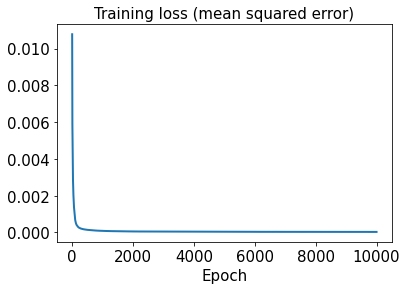

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

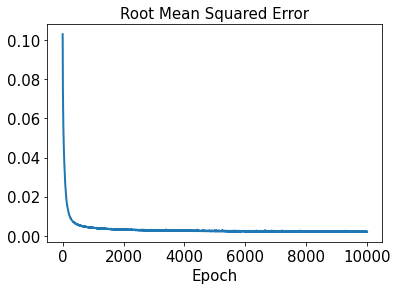

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

37/37 [==============================] - 0s 1ms/step - loss: 2.7134e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0026216505


In [54]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0044612763


In [55]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0025943406, 0.0023329502, 0.0014443271, 0.00054840354, 0.0017614599, 0.0011515572, 0.0017910966, 0.0023185327, 0.0020429543, 0.0025713823, 0.0033471934, 0.001330152, 0.00216778, 0.0023195602, 0.001257053, 0.002033417, 0.0028555593, 0.0041292156, 0.0026688827, 0.00086301356, 0.00070493814, 0.004086687, 0.0021069283, 0.0010540693, 0.008164758, 0.003155365, 0.002167477, 0.00045546907, 0.0056583183, 0.0019225446, 0.001415445, 0.0018459356, 0.00453633, 0.001063816, 0.001985075, 0.0016486133, 0.0017936982, 0.0046349703, 0.0014342259, 0.001076179, 0.0017968343, 0.0014125032, 0.00087018055, 0.0026436215, 0.0006314553, 0.0029432506, 0.0015728861, 0.0045108492, 0.003582924, 0.0006481857, 0.0017710023, 0.0016298633, 0.0016349021, 0.003555785, 0.0038353032, 0.00071144704, 0.0032028067, 0.0015553951, 0.0046837823, 0.0049227285, 0.0029760923, 0.0018309371, 0.001902534, 0.0016685115, 0.004119722, 0.002577587, 0.0019051422, 0.0012155919, 0.002474235, 0.0034740944, 0.0012235724, 0.0013188517, 0.0039

In [56]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.0022413789, 0.0018874847, 0.0027065747, 0.0047824928, 0.0034512945, 0.0038398965, 0.003026842, 0.0042498205, 0.0043454287, 0.0028966249, 0.0020060684, 0.011633397, 0.003293666, 0.002521018, 0.022589209, 0.0062378813, 0.0026027544, 0.019507563, 0.0023566266, 0.0051817256, 0.0027205076, 0.00068225496, 0.0026731214, 0.0020356285, 0.0019928508, 0.0056897327, 0.0029640796, 0.0026891162, 0.007986575, 0.010778299, 0.003369333, 0.0043560117, 0.0026037167, 0.008634953, 0.0023708118, 0.0059059053, 0.0017592098, 0.0018271607, 0.004960702, 0.0006994232, 0.006956565, 0.0016301752, 0.0025811011, 0.003568552, 0.0051028244, 0.0046458966, 0.0076420126, 0.003976249, 0.0025506788, 0.012564067, 0.0009619327, 0.0016999466, 0.0013376004, 0.0025361816, 0.0024796643, 0.0063239555, 0.013215423, 0.0047867, 0.0068384605, 0.0065928414, 0.003750925, 0.0017543001, 0.0040819077, 0.0070127957, 0.006975872, 0.0008203622, 0.0013397742, 0.007231275, 0.0024471087, 0.0018341271, 0.001364321, 0.008987334, 0.0037998366, 

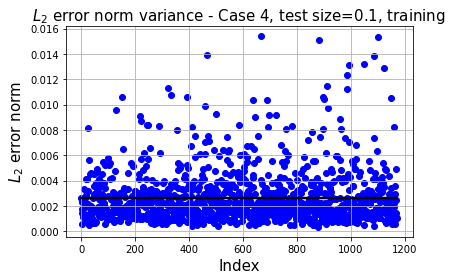

In [57]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 4, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

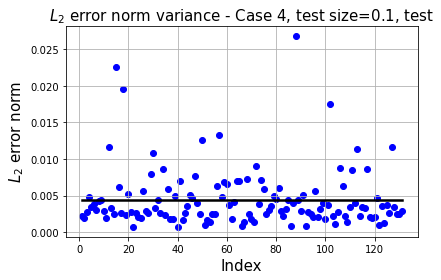

In [58]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 4, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

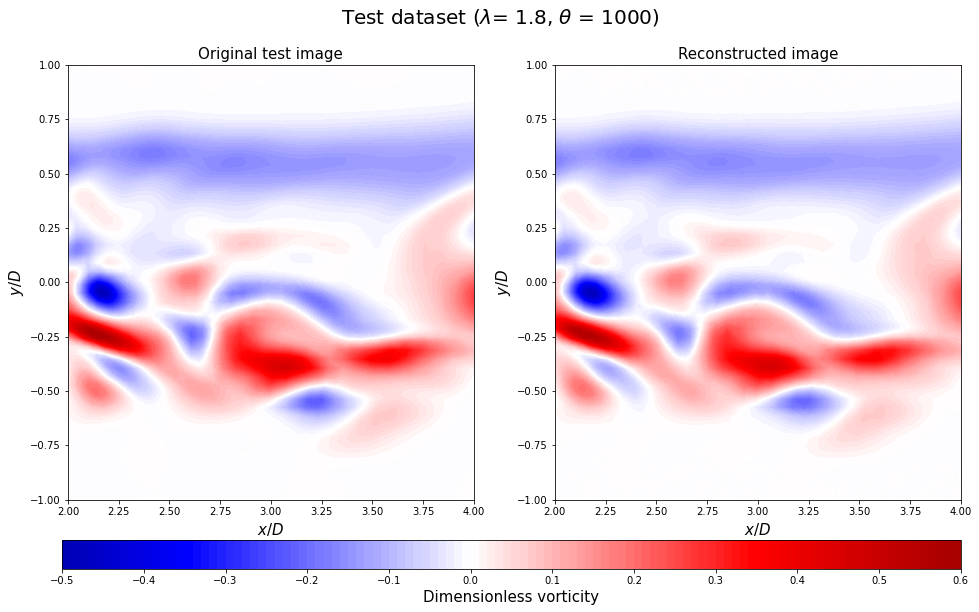

In [59]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

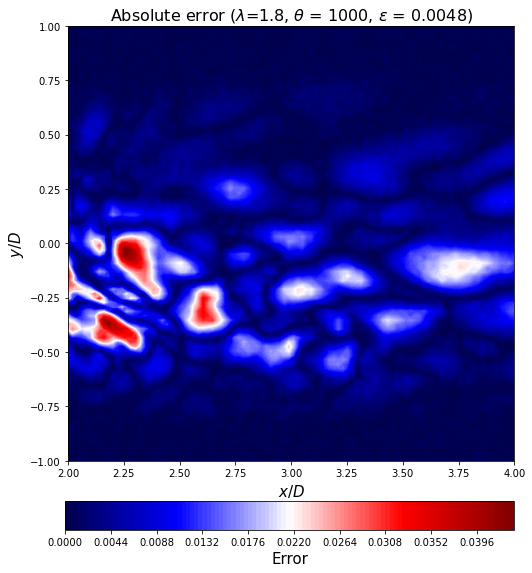

In [60]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()